In [8]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [9]:
archaic_df = read.table('~/populationgenomics/data/archaic/ArchaicSegments.txt',sep='\t', header = T)

How many individuals do we have?

In [10]:
length(unique(archaic_df$name))

[1] 358

How many populations do we have?

In [11]:
length(unique(archaic_df$pop))

[1] 110

How many regions?

In [12]:
unique(archaic_df$region)

[1] "EastAsia"           "WestEurasia"        "CentralAsiaSiberia"
[4] "SouthAsia"          "Melanesia"

`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.



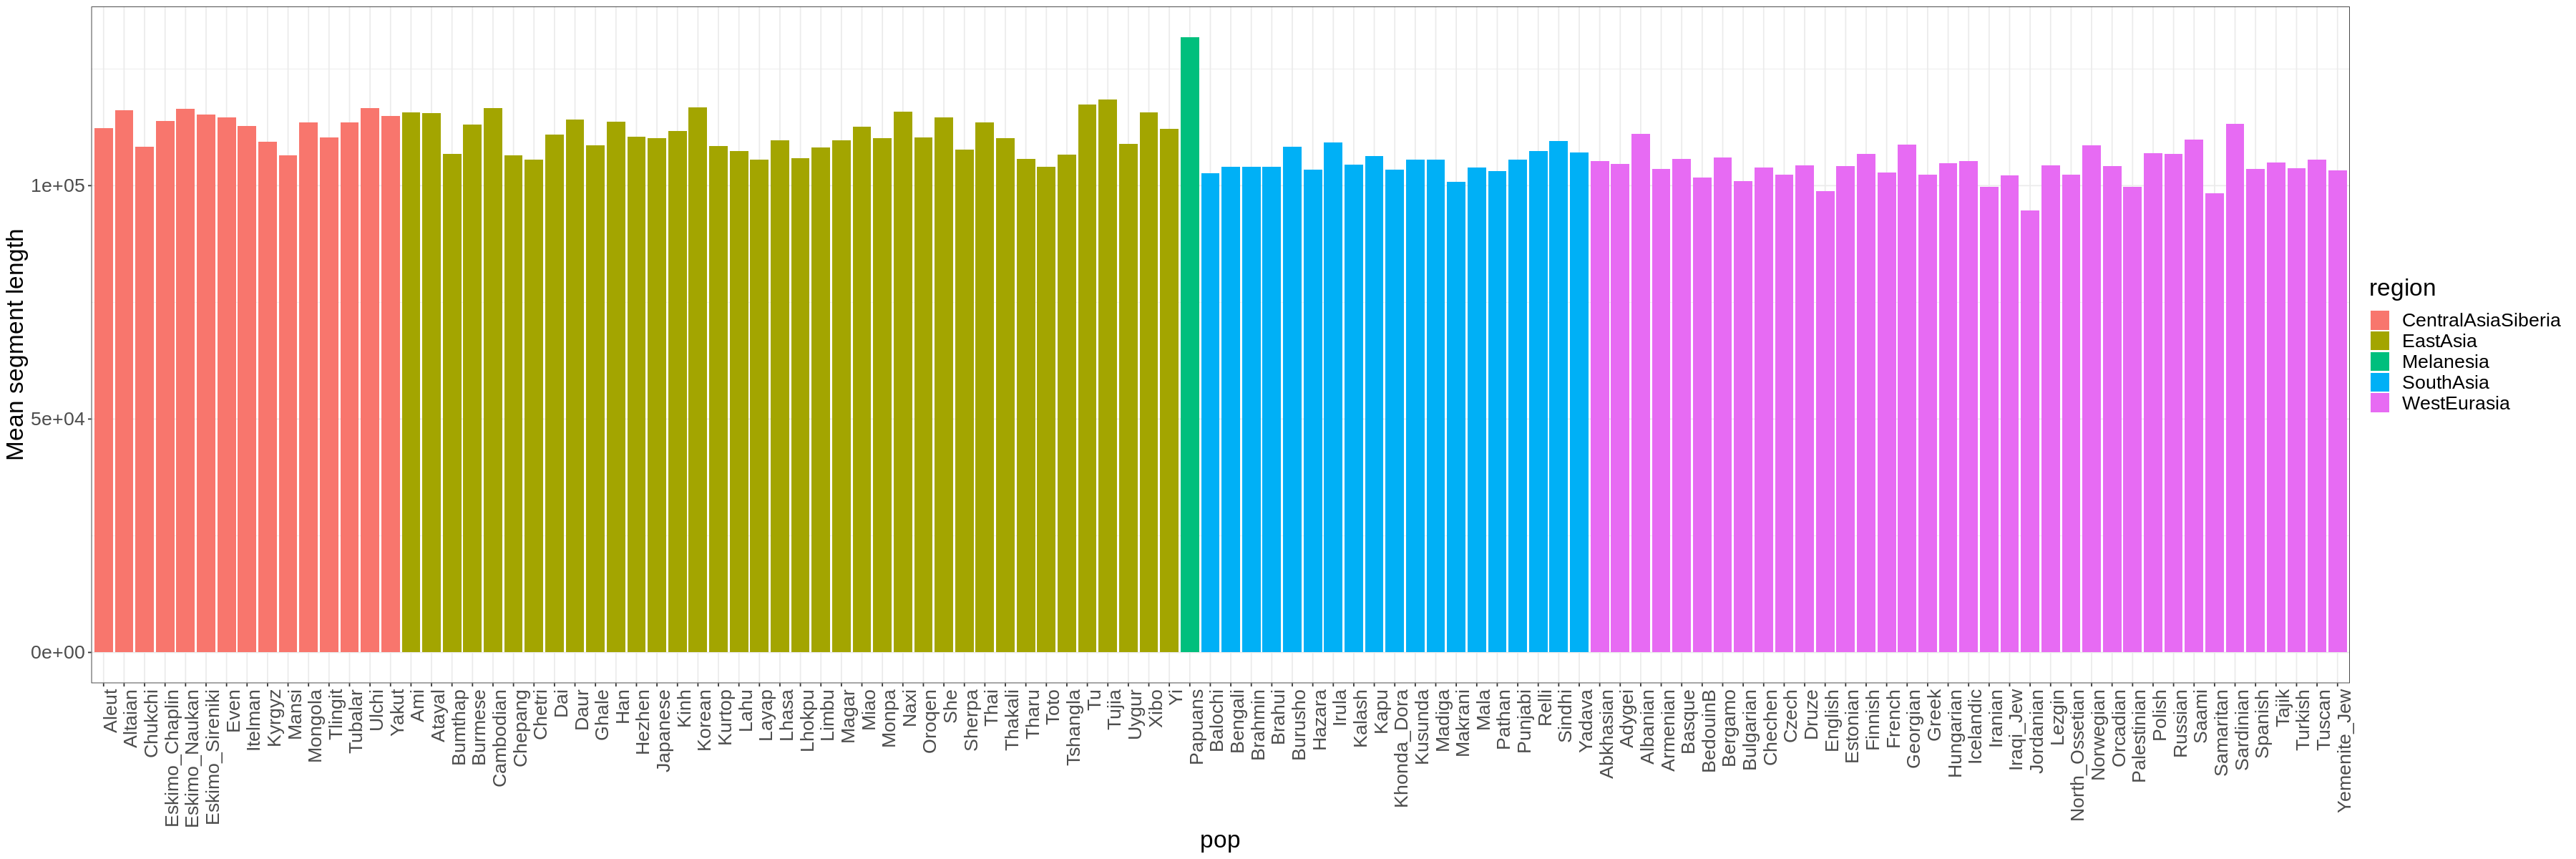

In [13]:
# Average archaic segment length by population:
options(repr.plot.width=30, repr.plot.height=10)

mean_seg_pop <- archaic_df %>%
        group_by(pop, region) %>%
        summarise(`Mean segment length` = mean(length))
  
mean_seg_pop %>%
 ungroup() %>%
  arrange(region) %>% 
    mutate(pop = factor(pop, pop)) %>%
        ggplot(aes(x = pop, y = `Mean segment length`, fill = region)) + 
            geom_bar(position = "dodge", stat="identity") + 
            theme_bw() +
            theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=20)) 

In [14]:
# What is the population with the highest average segment length?
mean_seg_pop[which.max(mean_seg_pop$`Mean segment length`),]

pop     region    Mean segment length
1 Papuans Melanesia 131784.3

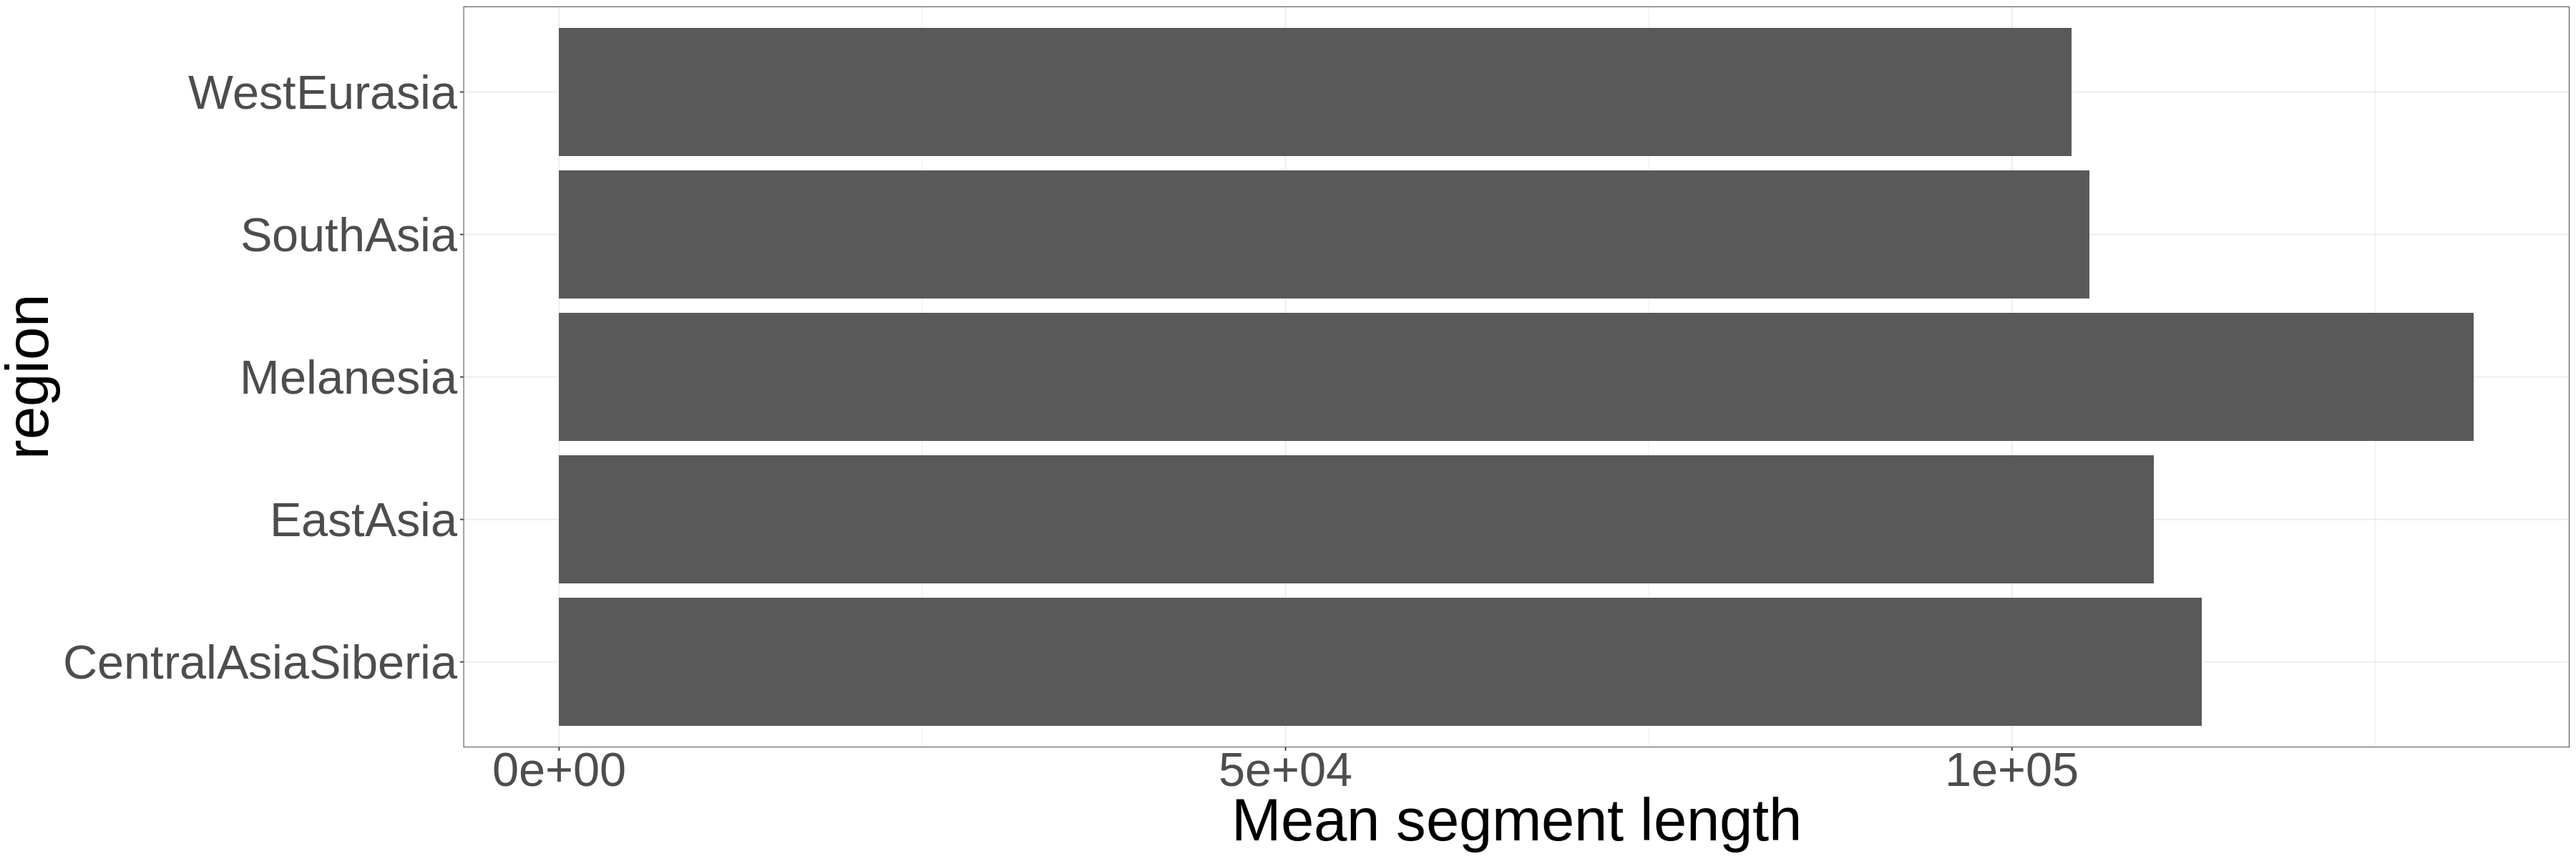

In [15]:
# What is the average length of segments by region?
mean_seg_region <- archaic_df %>%
        group_by(region) %>%
        summarise(`Mean segment length` = mean(length)) 

# Can you plot it?
ggplot(mean_seg_region, aes(x = region, y = `Mean segment length`)) +  
    geom_bar(position = "dodge", stat="identity") +
    theme_bw() +
    coord_flip() +
    theme(text = element_text(size=50)) 

#### Q1. Find the total lengths of Arcahic fragments in each individual

In [16]:
# Total archaic segment length by ind and grouped by population and region:
total_seg_ind <- archaic_df %>%
        group_by(name, pop, region) %>%
        summarise(`Total segment length` = sum(length))
 
head(total_seg_ind) 

`summarise()` has grouped output by 'name', 'pop'. You can override using the `.groups` argument.



name    pop     region    Total segment length
1 13733_8 Papuans Melanesia 168490000           
2 13748_1 Papuans Melanesia 175569000           
3 13748_2 Papuans Melanesia 172182000           
4 13748_3 Papuans Melanesia 165722000           
5 13748_4 Papuans Melanesia 160407000           
6 13748_5 Papuans Melanesia 167427000

#### Q2. Summarise the total length per population and per region

`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.



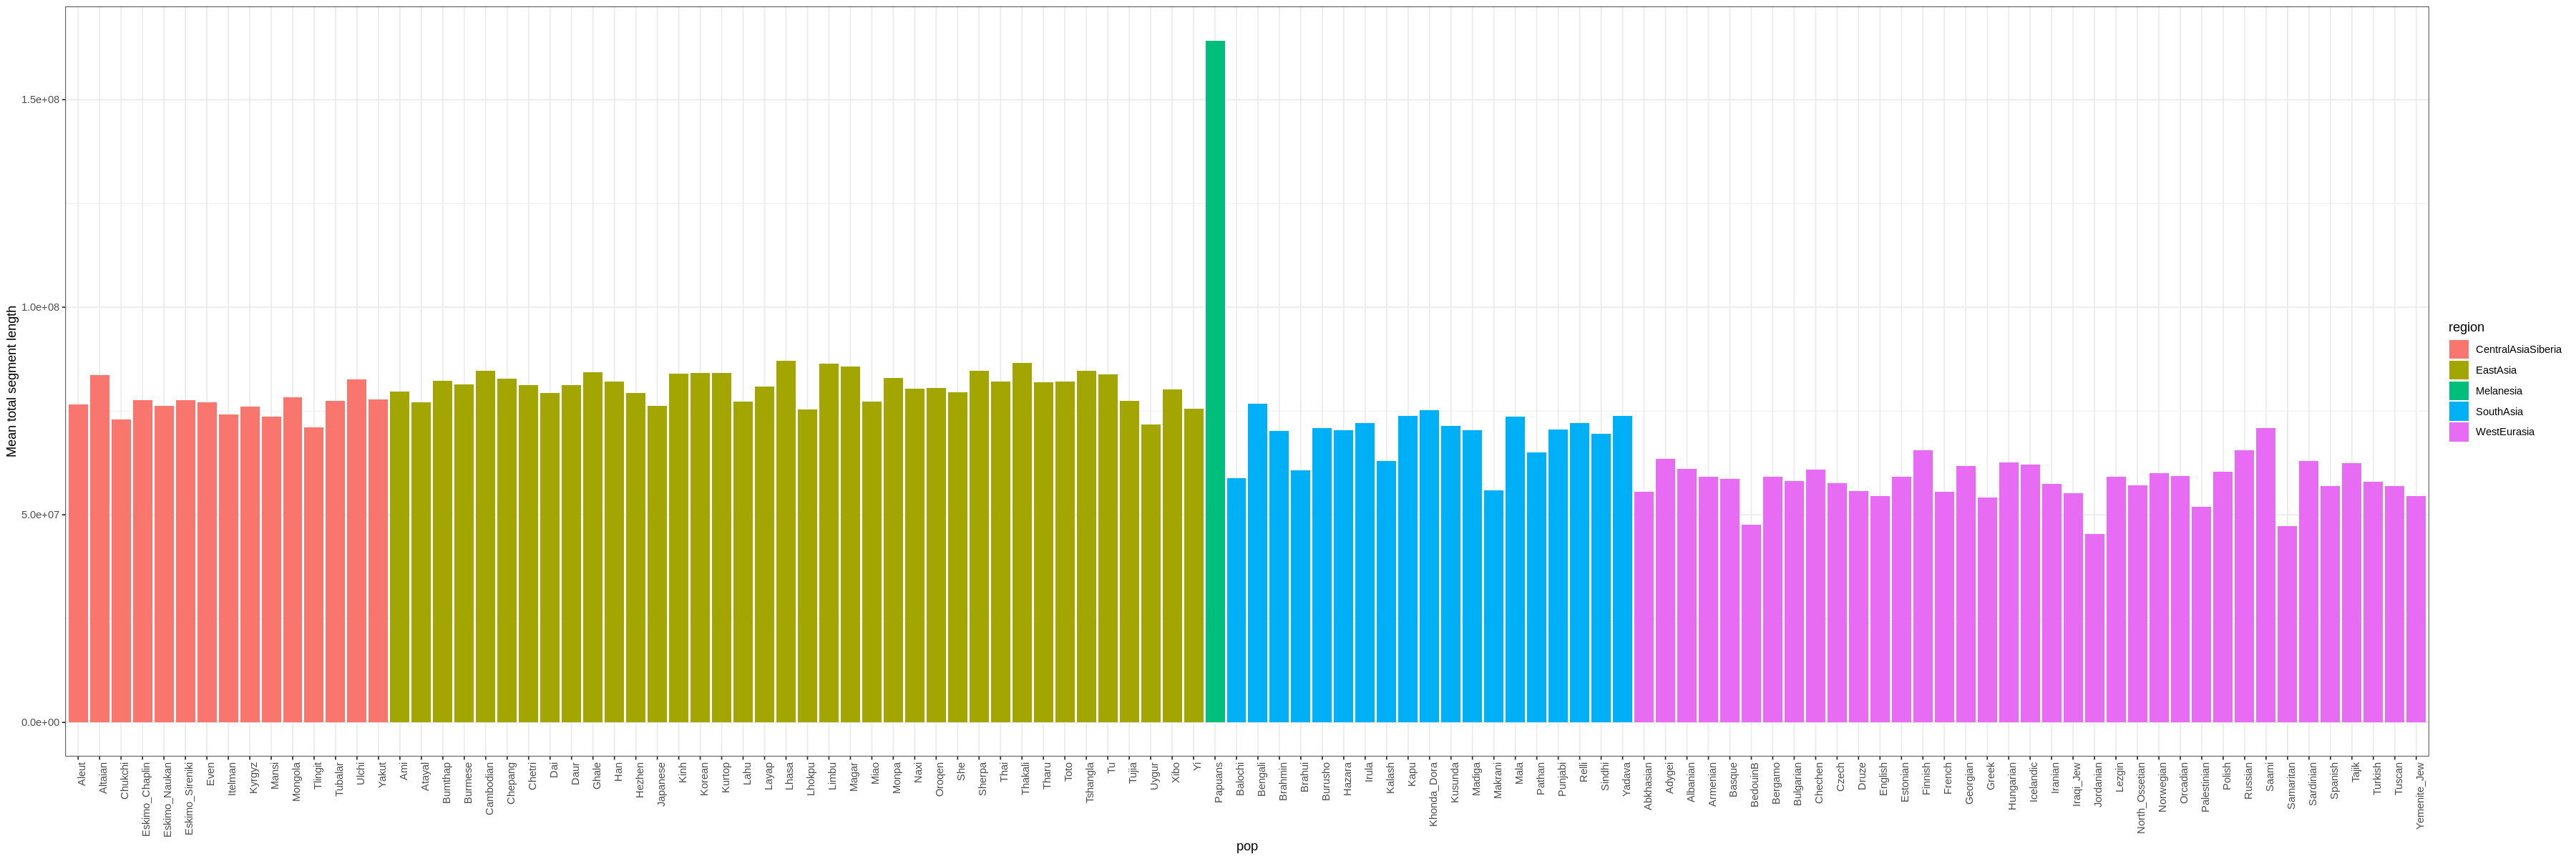

In [17]:
total_seg_ind %>%
  group_by(pop,region) %>%
  summarise(`Mean total segment length`=mean(`Total segment length`)) %>%
  ungroup() %>%
  arrange(region) %>% 
  mutate(pop = factor(pop, pop)) %>%
  ggplot(aes(x = pop, y = `Mean total segment length`,
        fill = region)) + 
        geom_bar(position = "dodge", stat="identity") + 
        theme_bw() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

#### Q3. Which population has most archaic ancestry? Why?

Papuans. Denisovans.

#### Q4. What is the length distribution of fragments for the five different regions (hint: you can use facet_grid to plot all at once)

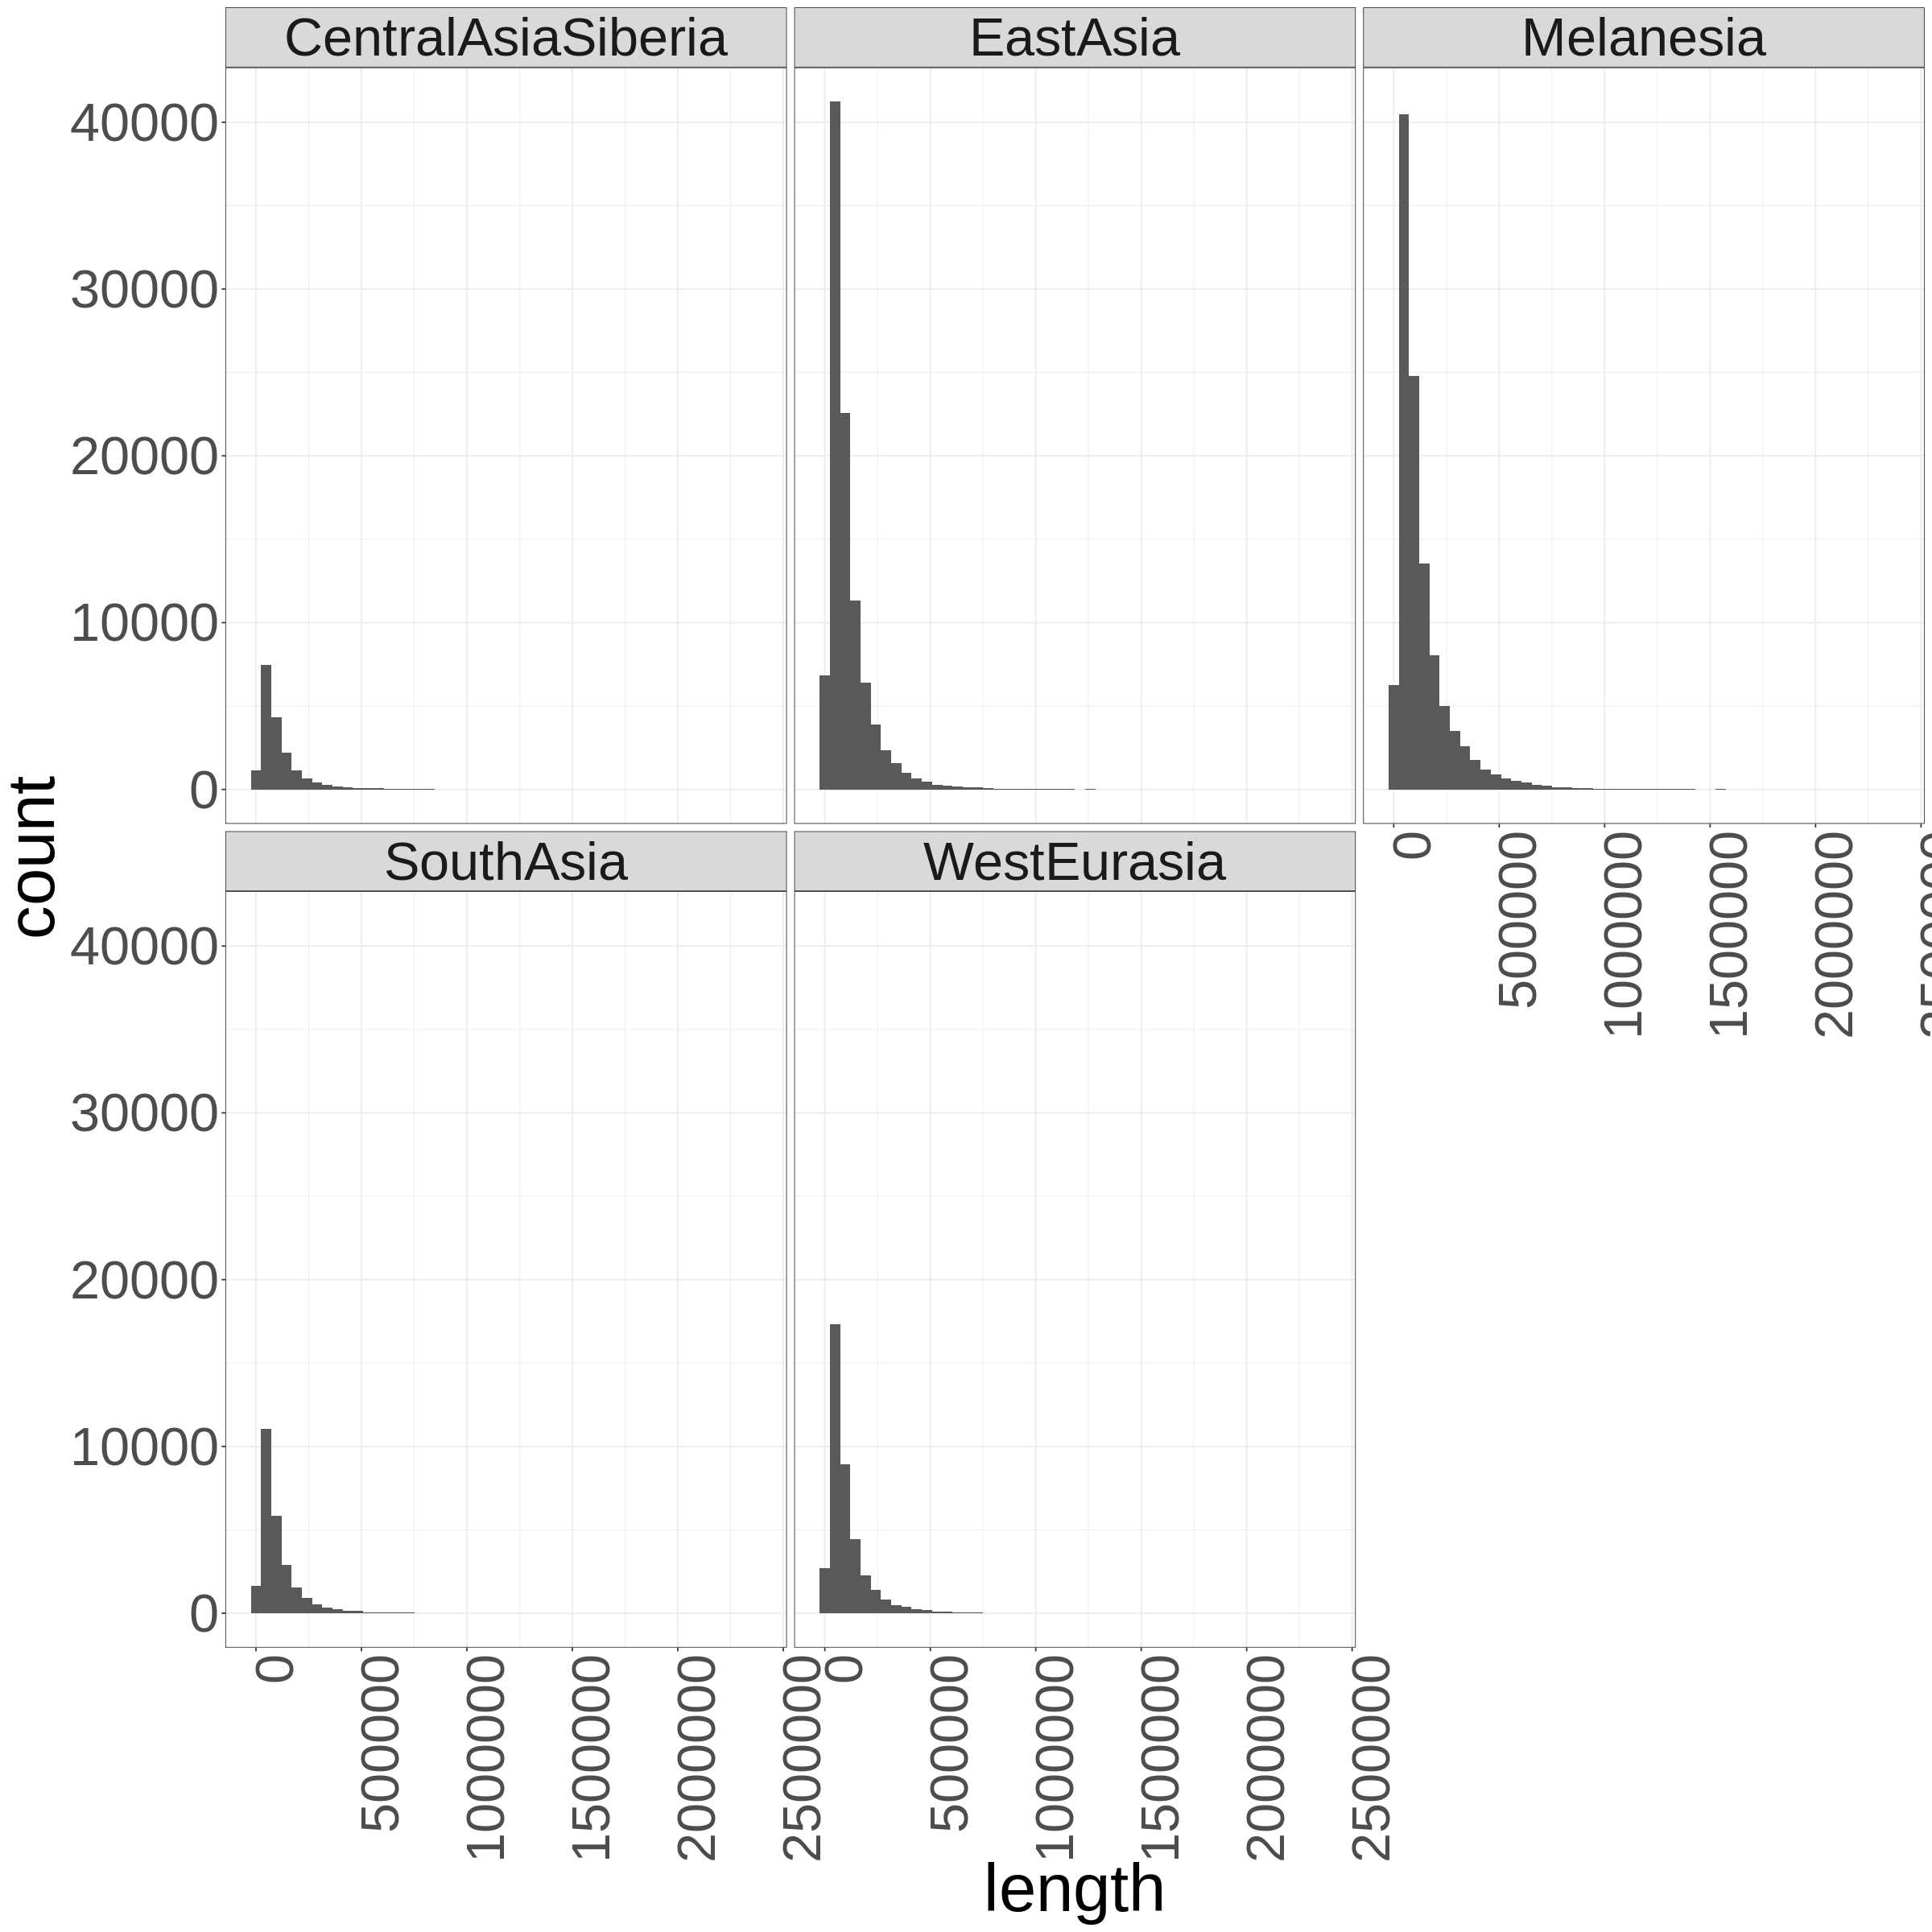

In [20]:
options(repr.plot.width=20, repr.plot.height=20)
archaic_df %>%
        group_by(region) %>%
        ggplot(aes(length)) + 
        theme_bw() +
        geom_histogram(bins = 50) + 
        facet_wrap(~region) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))

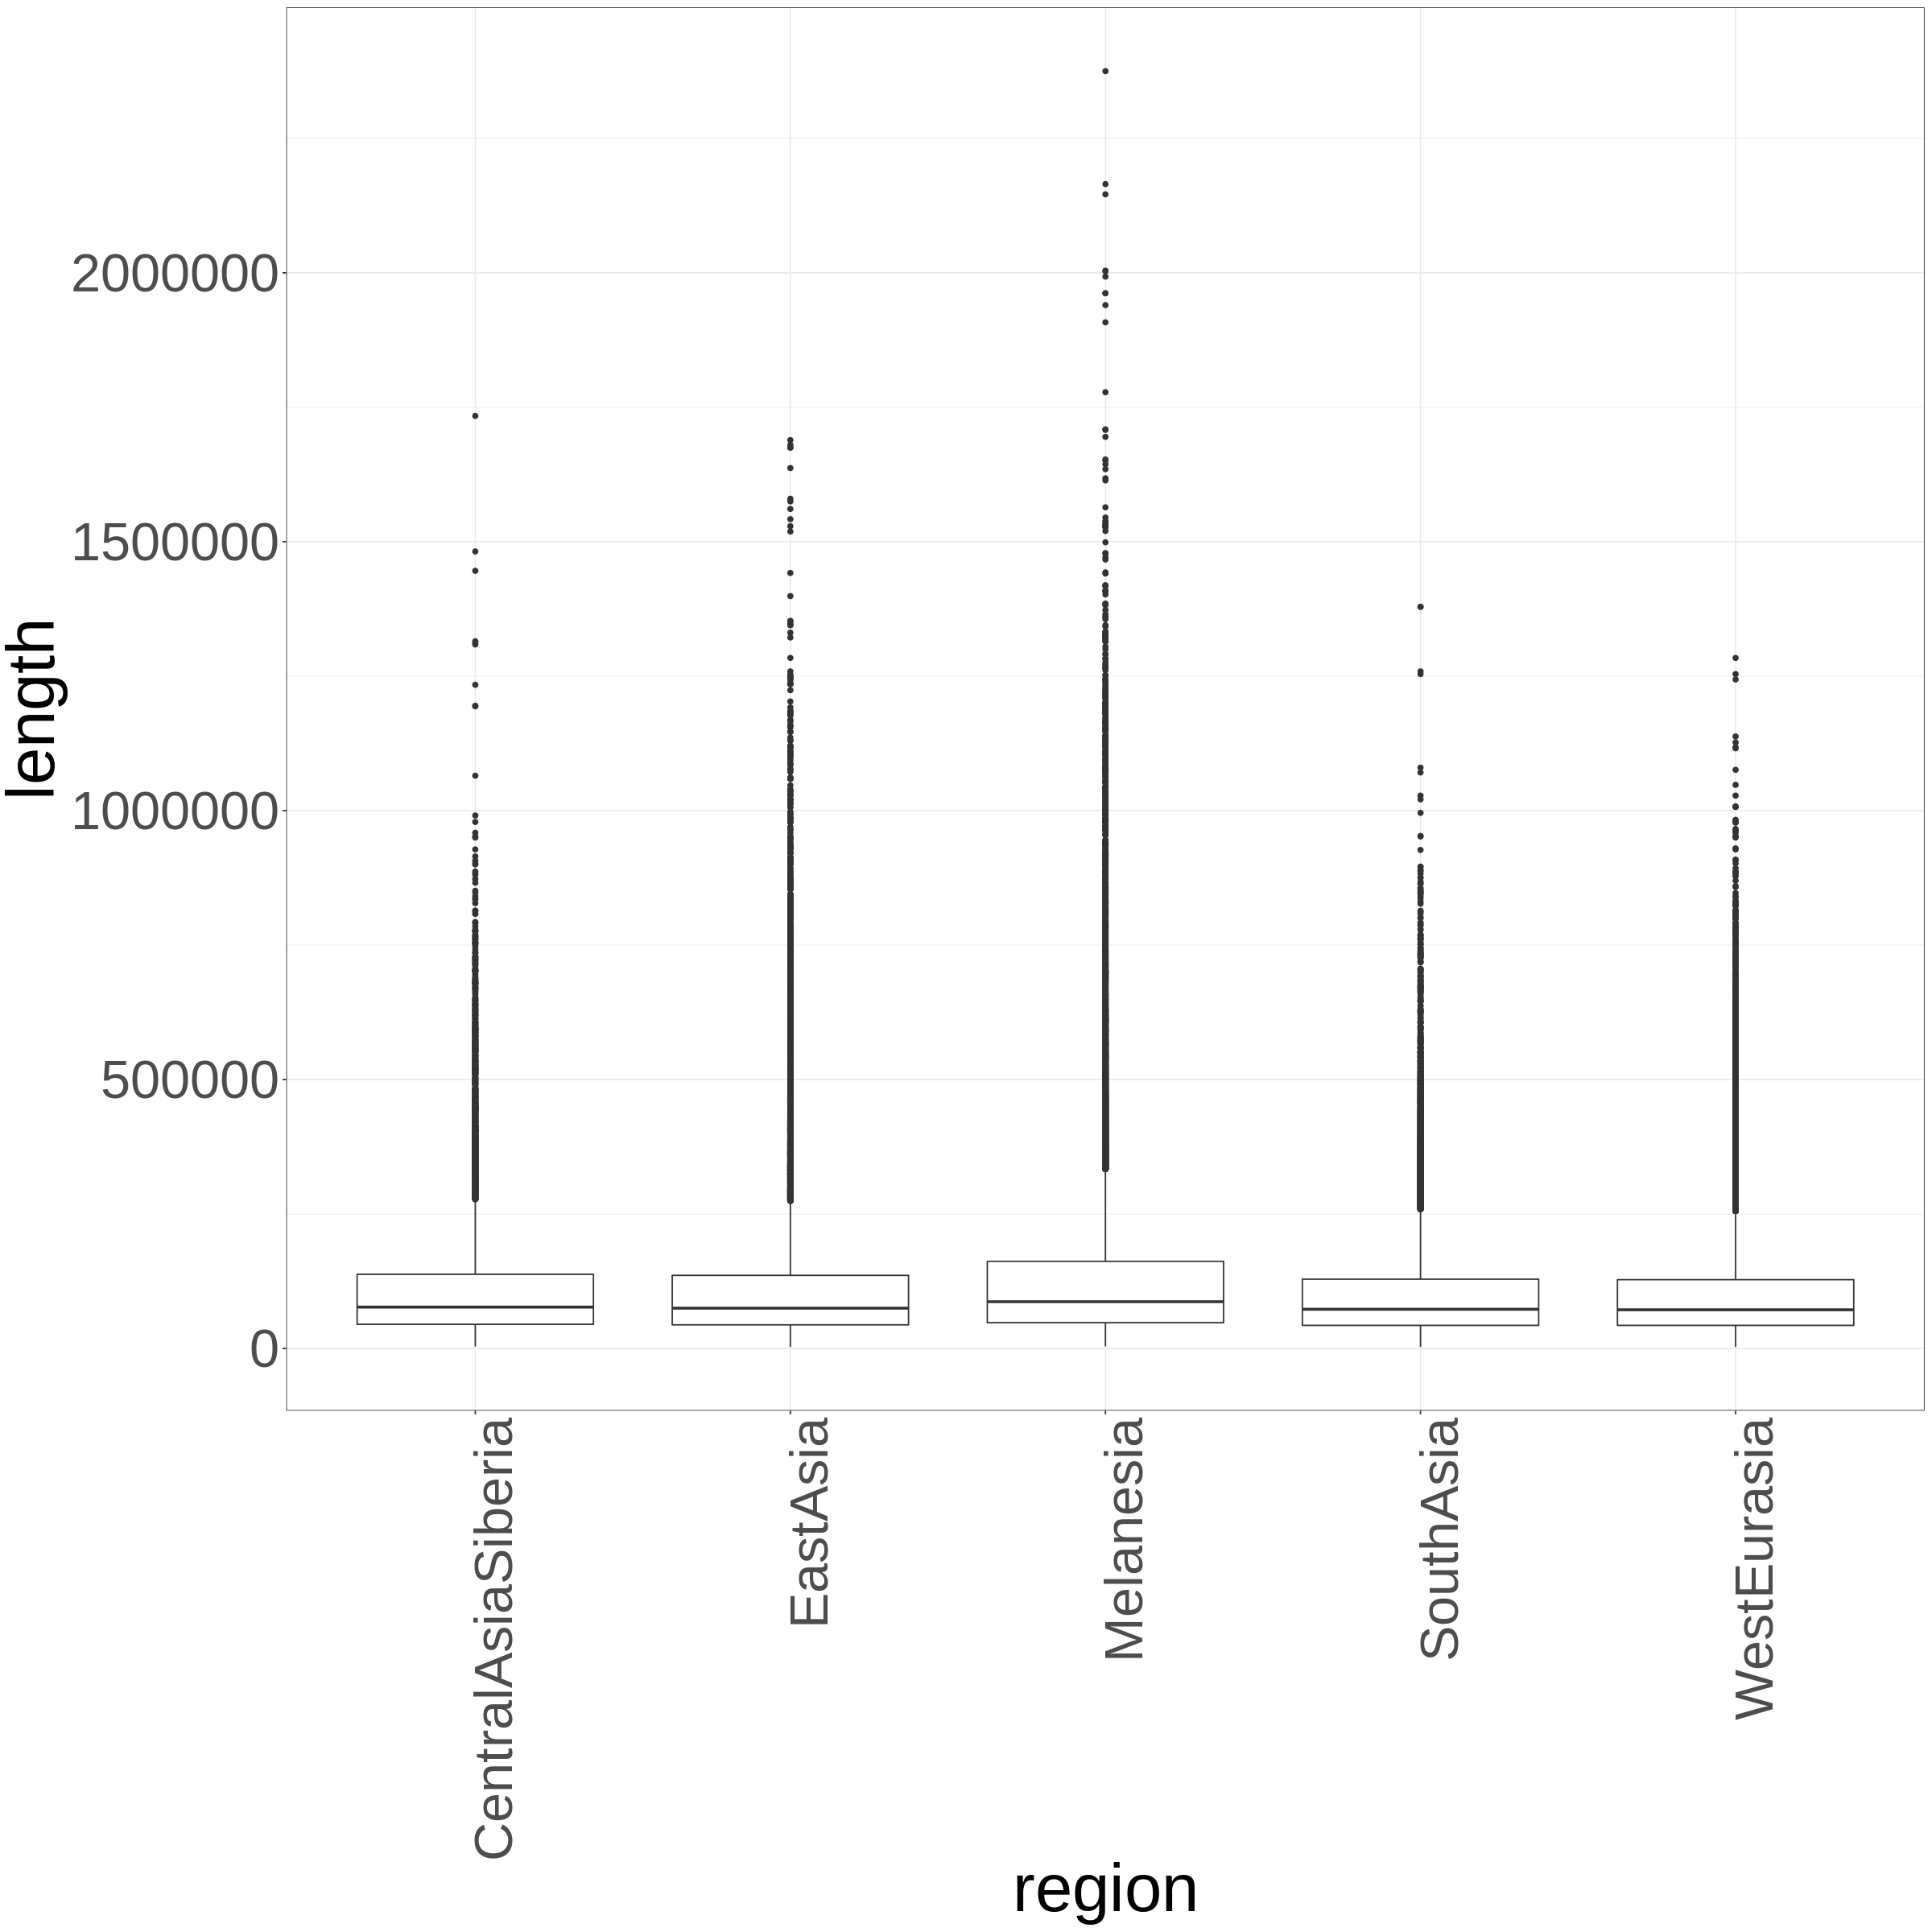

In [21]:
archaic_df %>%
        group_by(region) %>%
        ggplot(aes(y=length,x=region)) + 
        theme_bw() +
        geom_boxplot() + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))

#### Q5. What is the average length of fragments for each population and each region

`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.



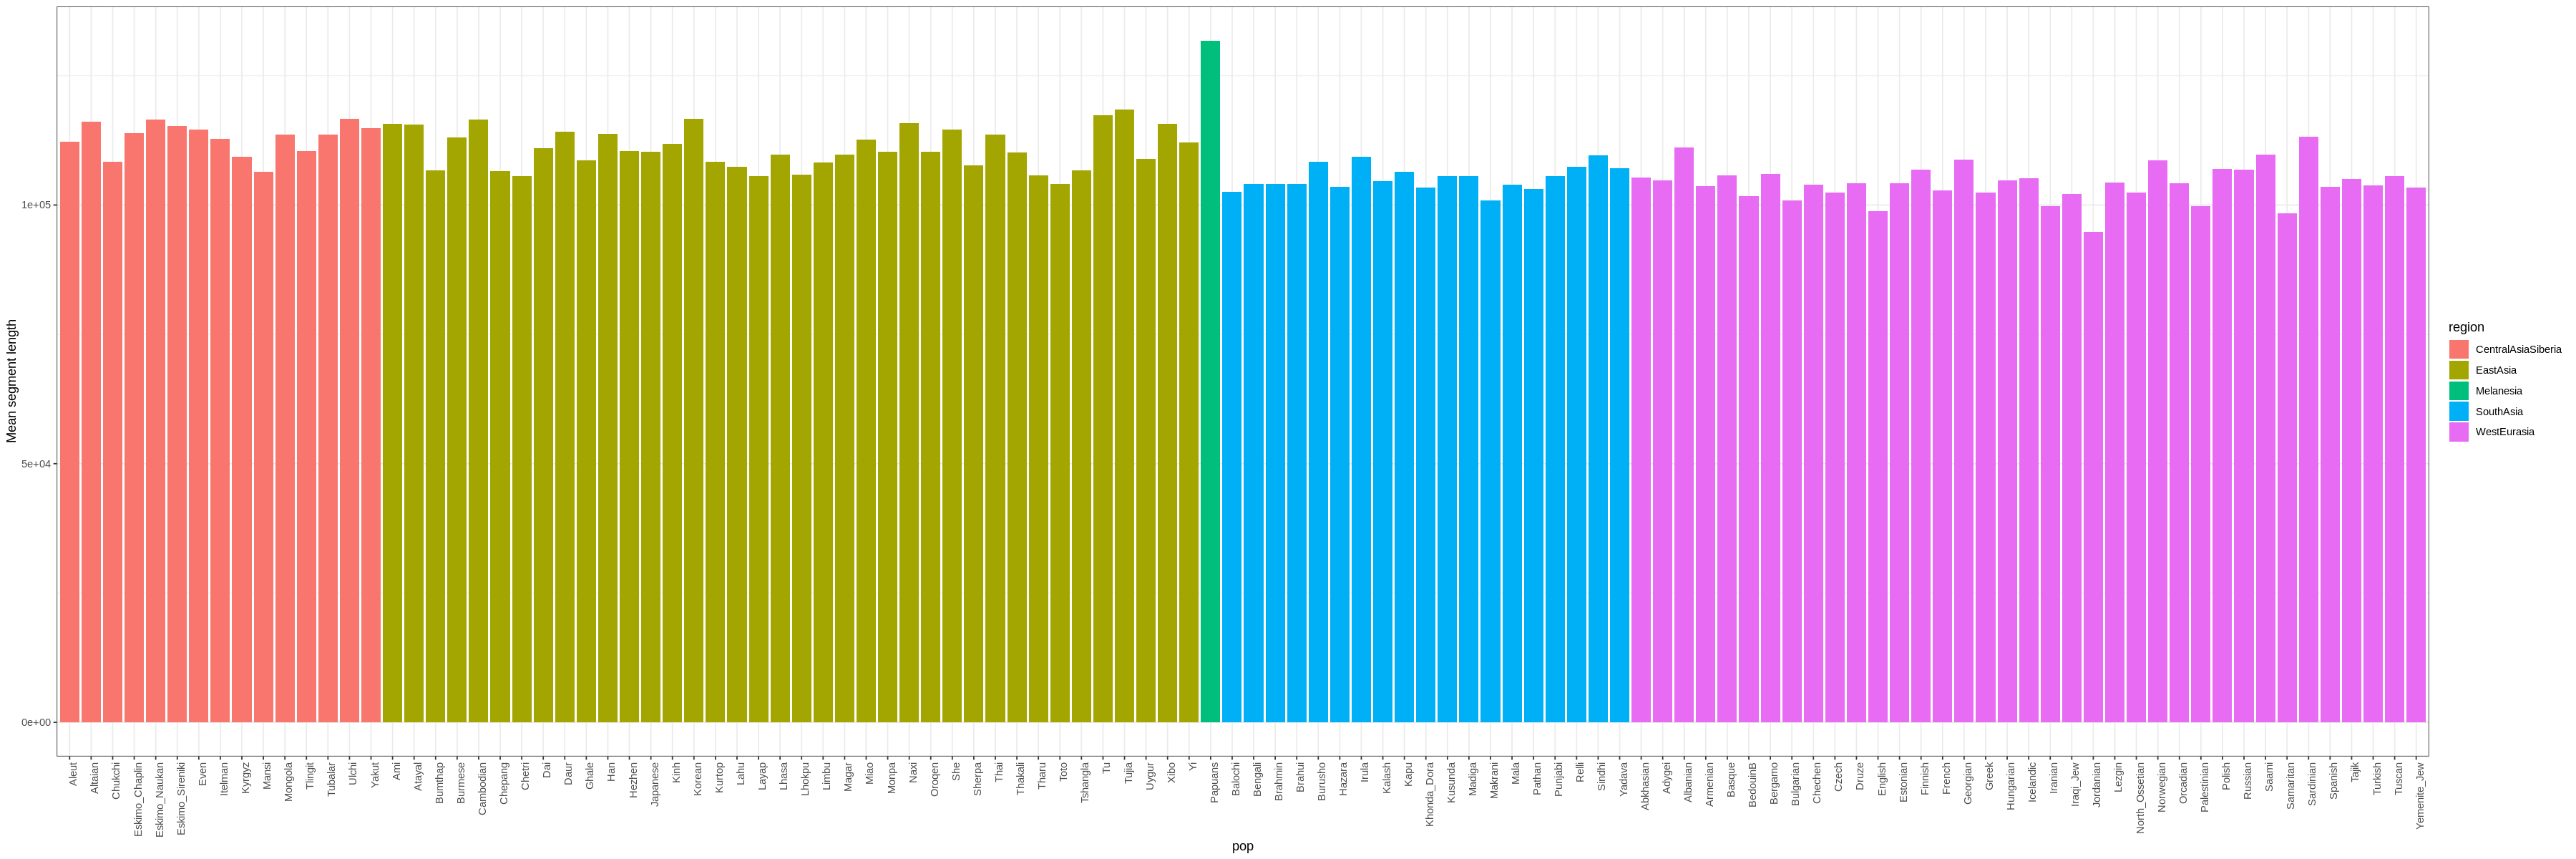

In [22]:
# What is the average length of segments by population and region sorted:
options(repr.plot.width=30, repr.plot.height=10)

mean_seg_pop <- archaic_df %>%
        group_by(pop, region) %>%
        summarise(`Mean segment length` = mean(length))
  
mean_seg_pop %>%
  ungroup() %>%
  arrange(region) %>% 
  mutate(pop = factor(pop, pop)) %>%
  ggplot(aes(x = pop, y = `Mean segment length`, fill = region)) + 
        geom_bar(position = "dodge", stat="identity") + 
        theme_bw() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

#### Q6. What can cause different mean fragment lengths?

Differences in recombination rate, more than one wave of introgression in one of the regions. Recent gene flow/introgression from denisovans/neanderthal after migration out of Africa. Generation time.

## The origin of archaic fragments 

#### Q1. For each individual, assign the archaic segments to origin and reconstruct a Figure in the same style as Figure 5 of the Cell paper (plot below).

`summarise()` has grouped output by 'name', 'closest_to'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'pop'. You can override using the `.groups` argument.



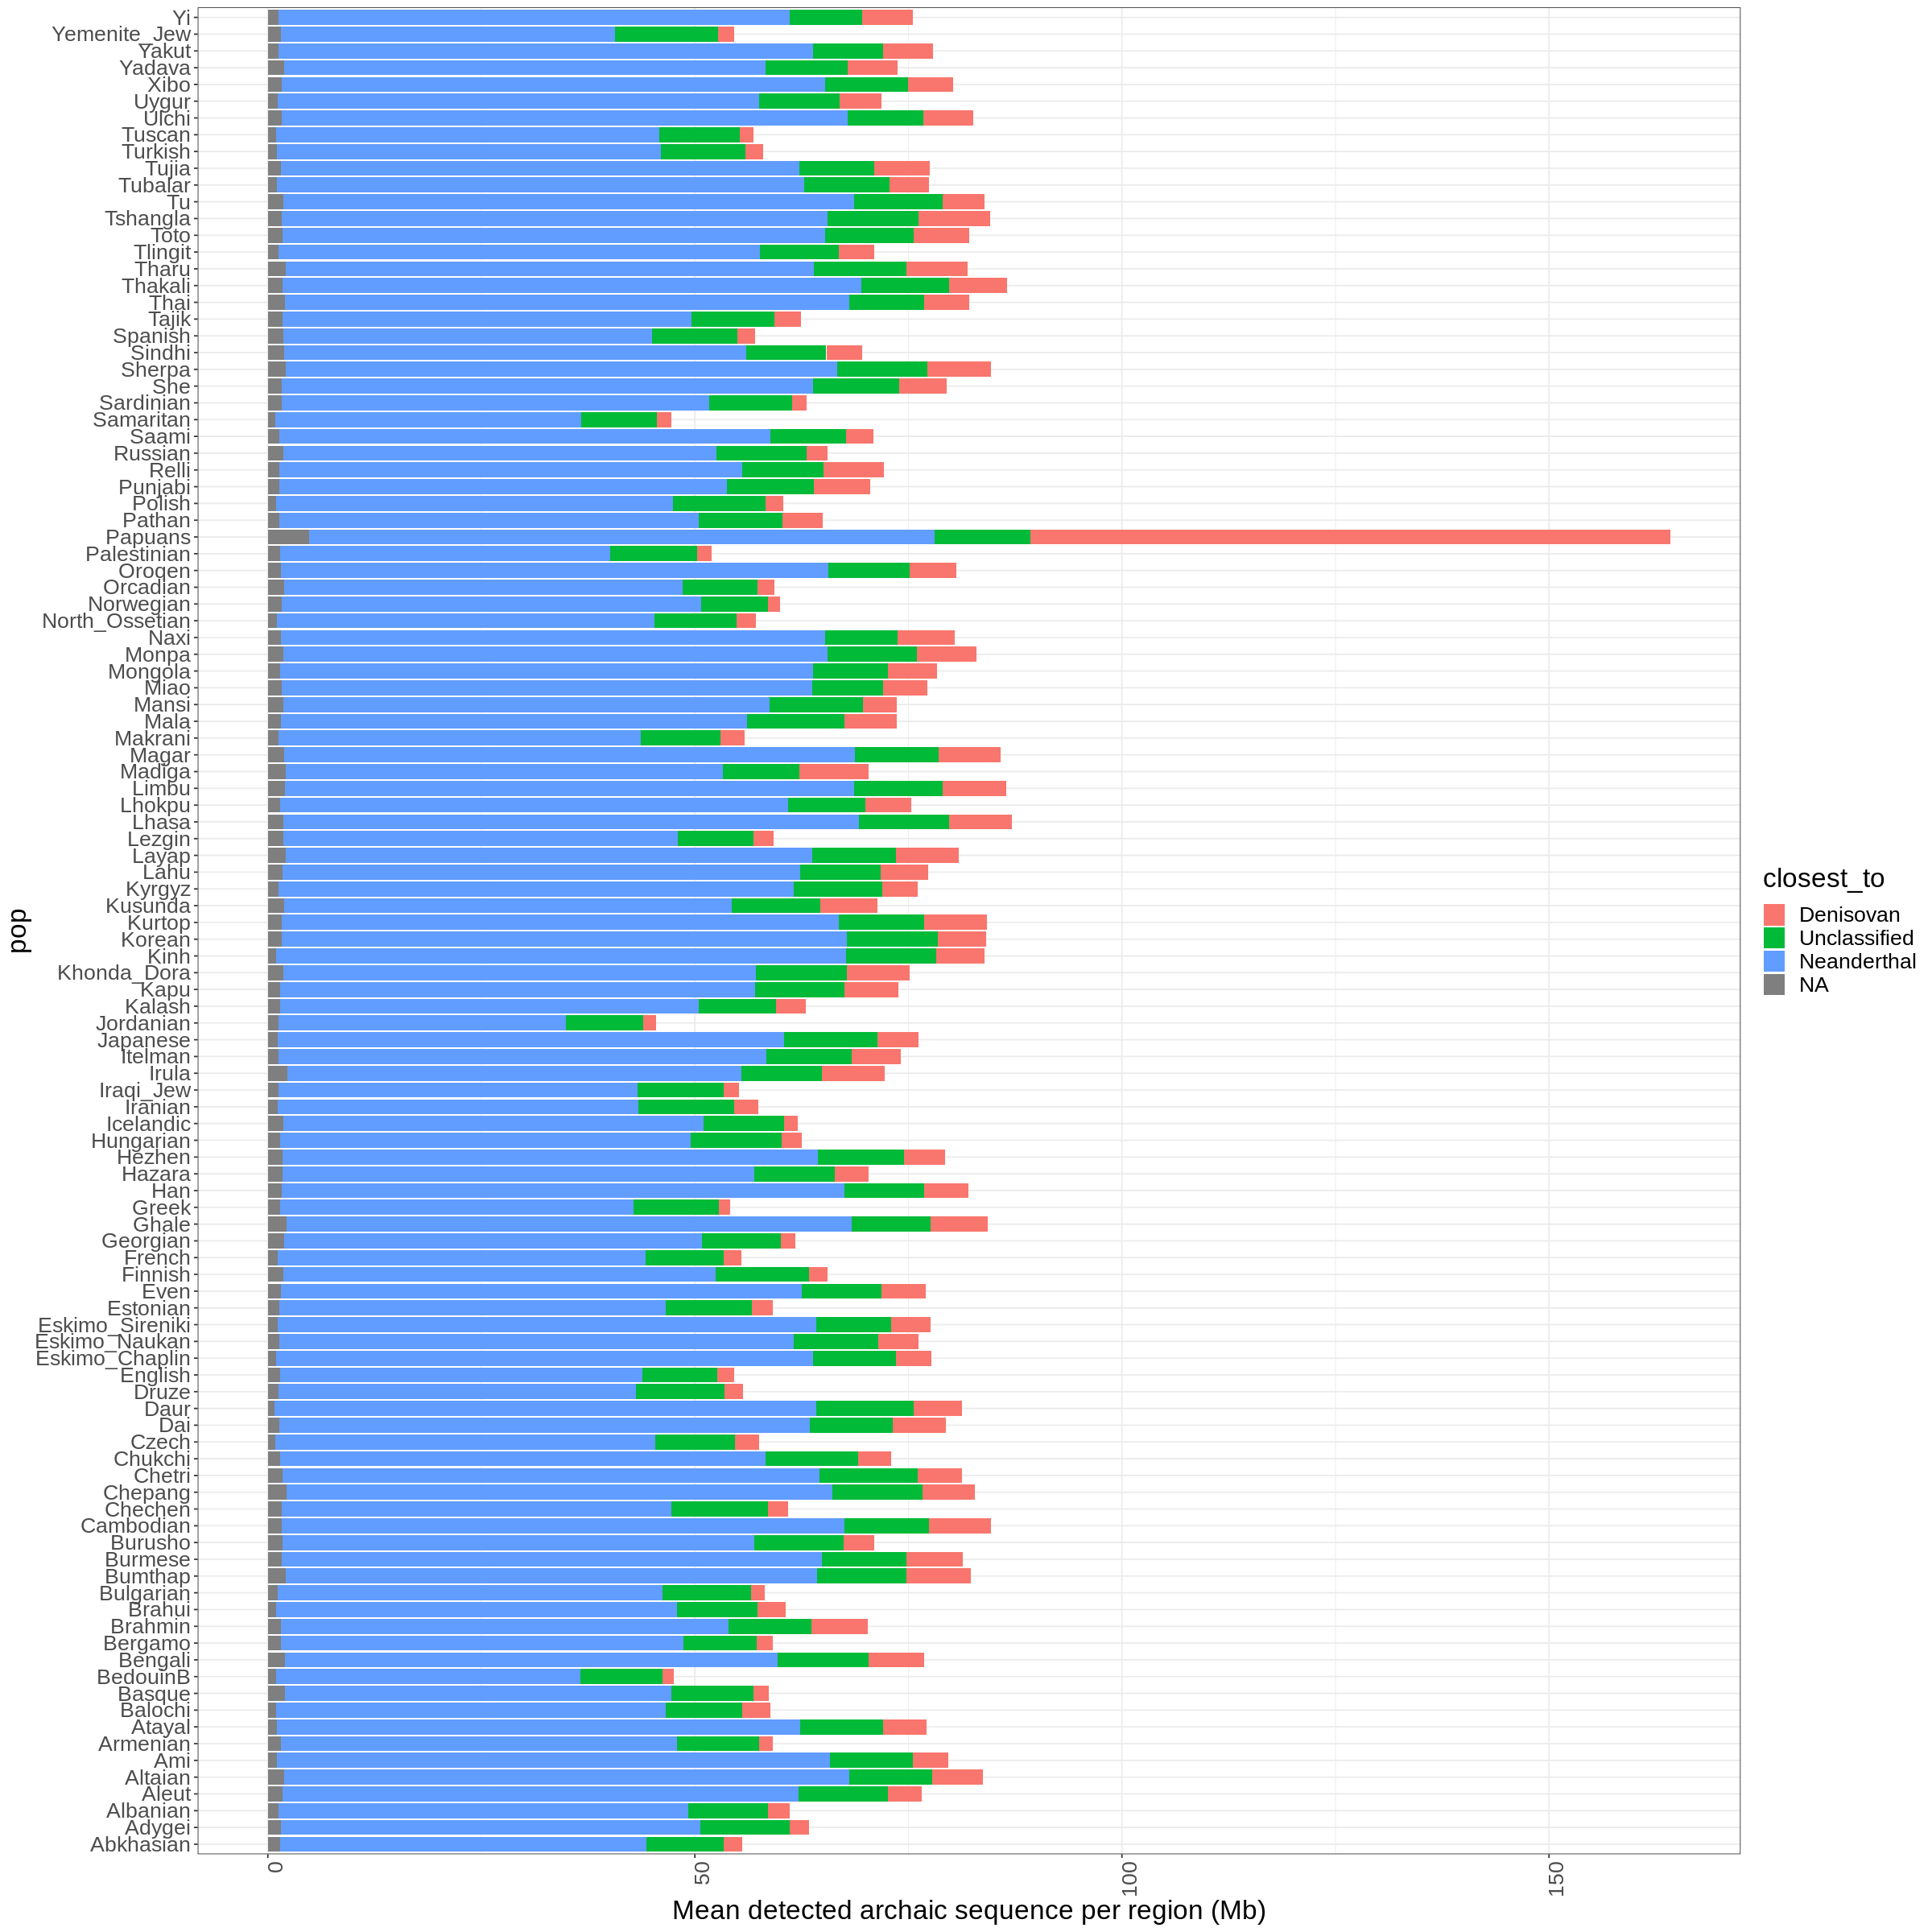

In [24]:
options(repr.plot.width=20, repr.plot.height=20)

archaic_df <- archaic_df %>% 
    mutate(closest_to = case_when(
        Shared_with_Altai > Shared_with_Denisova | Shared_with_Vindija > Shared_with_Denisova ~ "Neanderthal",
        Shared_with_Altai < Shared_with_Denisova & Shared_with_Vindija < Shared_with_Denisova ~ "Denisovan",
        Shared_with_Altai + Shared_with_Vindija + Shared_with_Denisova == 0 ~ "Unclassified"
    ))
archaic_df %>%
    group_by(name, closest_to, pop) %>%
    summarise(total = sum(length)) %>%
    ungroup() %>%
    group_by(pop, closest_to) %>%
    summarise(mean_sequences = mean(total)) %>% 
    ungroup() %>%
    mutate(closest_to = factor(closest_to, c('Denisovan', 'Unclassified', 'Neanderthal'))) %>%
    ggplot(aes(x = pop, y = mean_sequences/10^6, fill = closest_to)) +
        geom_bar(stat="identity") + theme_bw() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        ylab('Mean detected archaic sequence per region (Mb)') + 
        coord_flip() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=20))

#### Q2. What are major differences? What can explain these differences?

Higher archaic proportions for Papuans. Differences in proportions and lengths between methods.



#### Q3. Summarize the results by averaging over region and plot these.


`summarise()` has grouped output by 'name', 'closest_to'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.



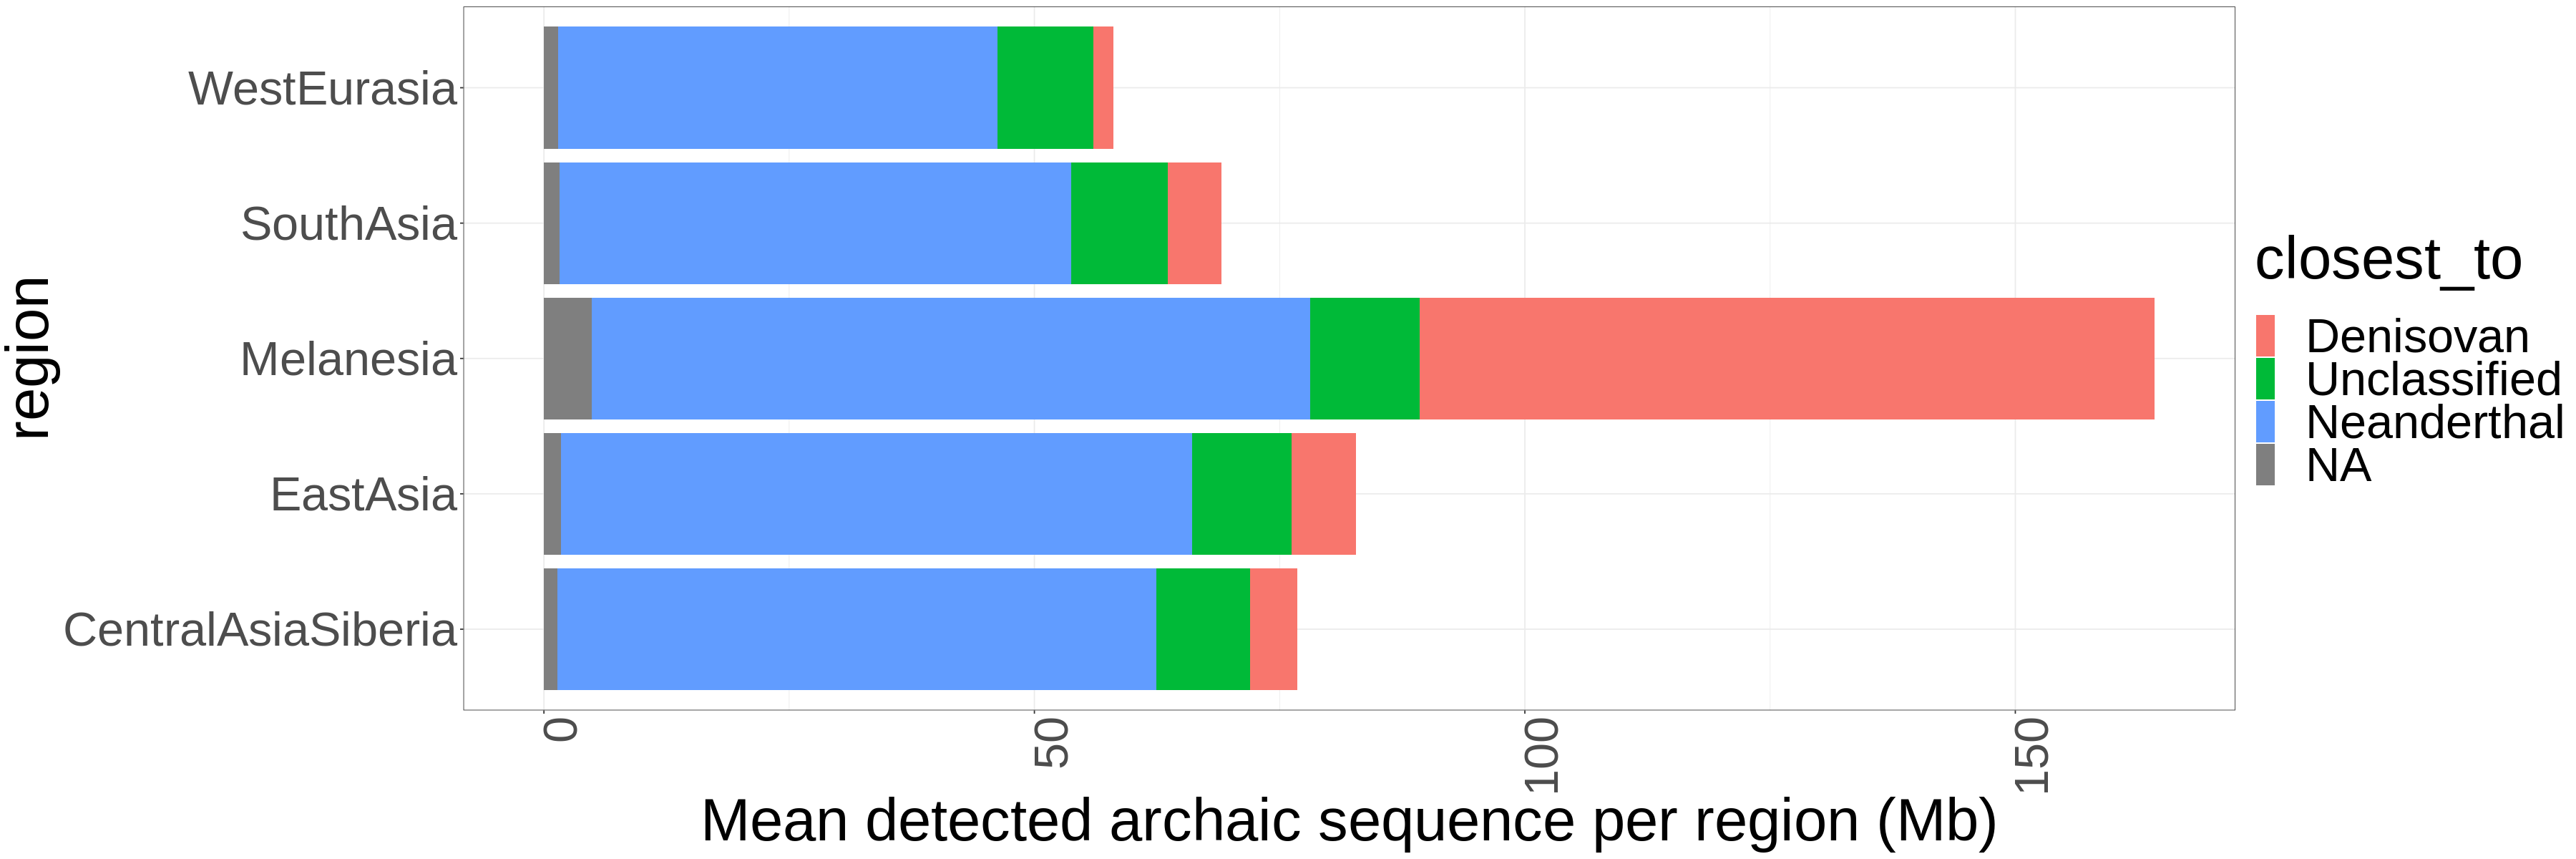

In [25]:
# Plotting by region
options(repr.plot.width=30, repr.plot.height=10)

archaic_df %>% 
    group_by(name, closest_to, region) %>%
    summarise(total = sum(length)) %>%
    ungroup() %>%
    group_by(region, closest_to) %>%
    summarise(mean_sequences = mean(total)) %>% 
    ungroup() %>%
    mutate(closest_to = factor(closest_to, c('Denisovan', 'Unclassified', 'Neanderthal'))) %>%
    ggplot(aes(x = region, y = mean_sequences/10^6, fill = closest_to)) +
        geom_bar(stat="identity") + theme_bw() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        ylab('Mean detected archaic sequence per region (Mb)') + 
        coord_flip() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))

East Asians have been shown to contain more Neanderthal admixture (maybe because of a second admixture event after the European-East Asian split or maybe because of dilution of the Neanderthal component in the European population because of migrations from non-admixed populations). Additionally, it has been shown that East Asians contain higher admixture proportions of a different Denisovan origin, than South Asians and Papuans. The component most related to the Altai genome is the one present in a higher proportion in East Asians, compared to South Asians and Papuans. East Asians contain both components with similar proportions (two waves of admixture).

#### Q6. Determine the fragment length distribution of segment of Neanderthal and Denisova origin separately for each region. Compare the median of the distributions.

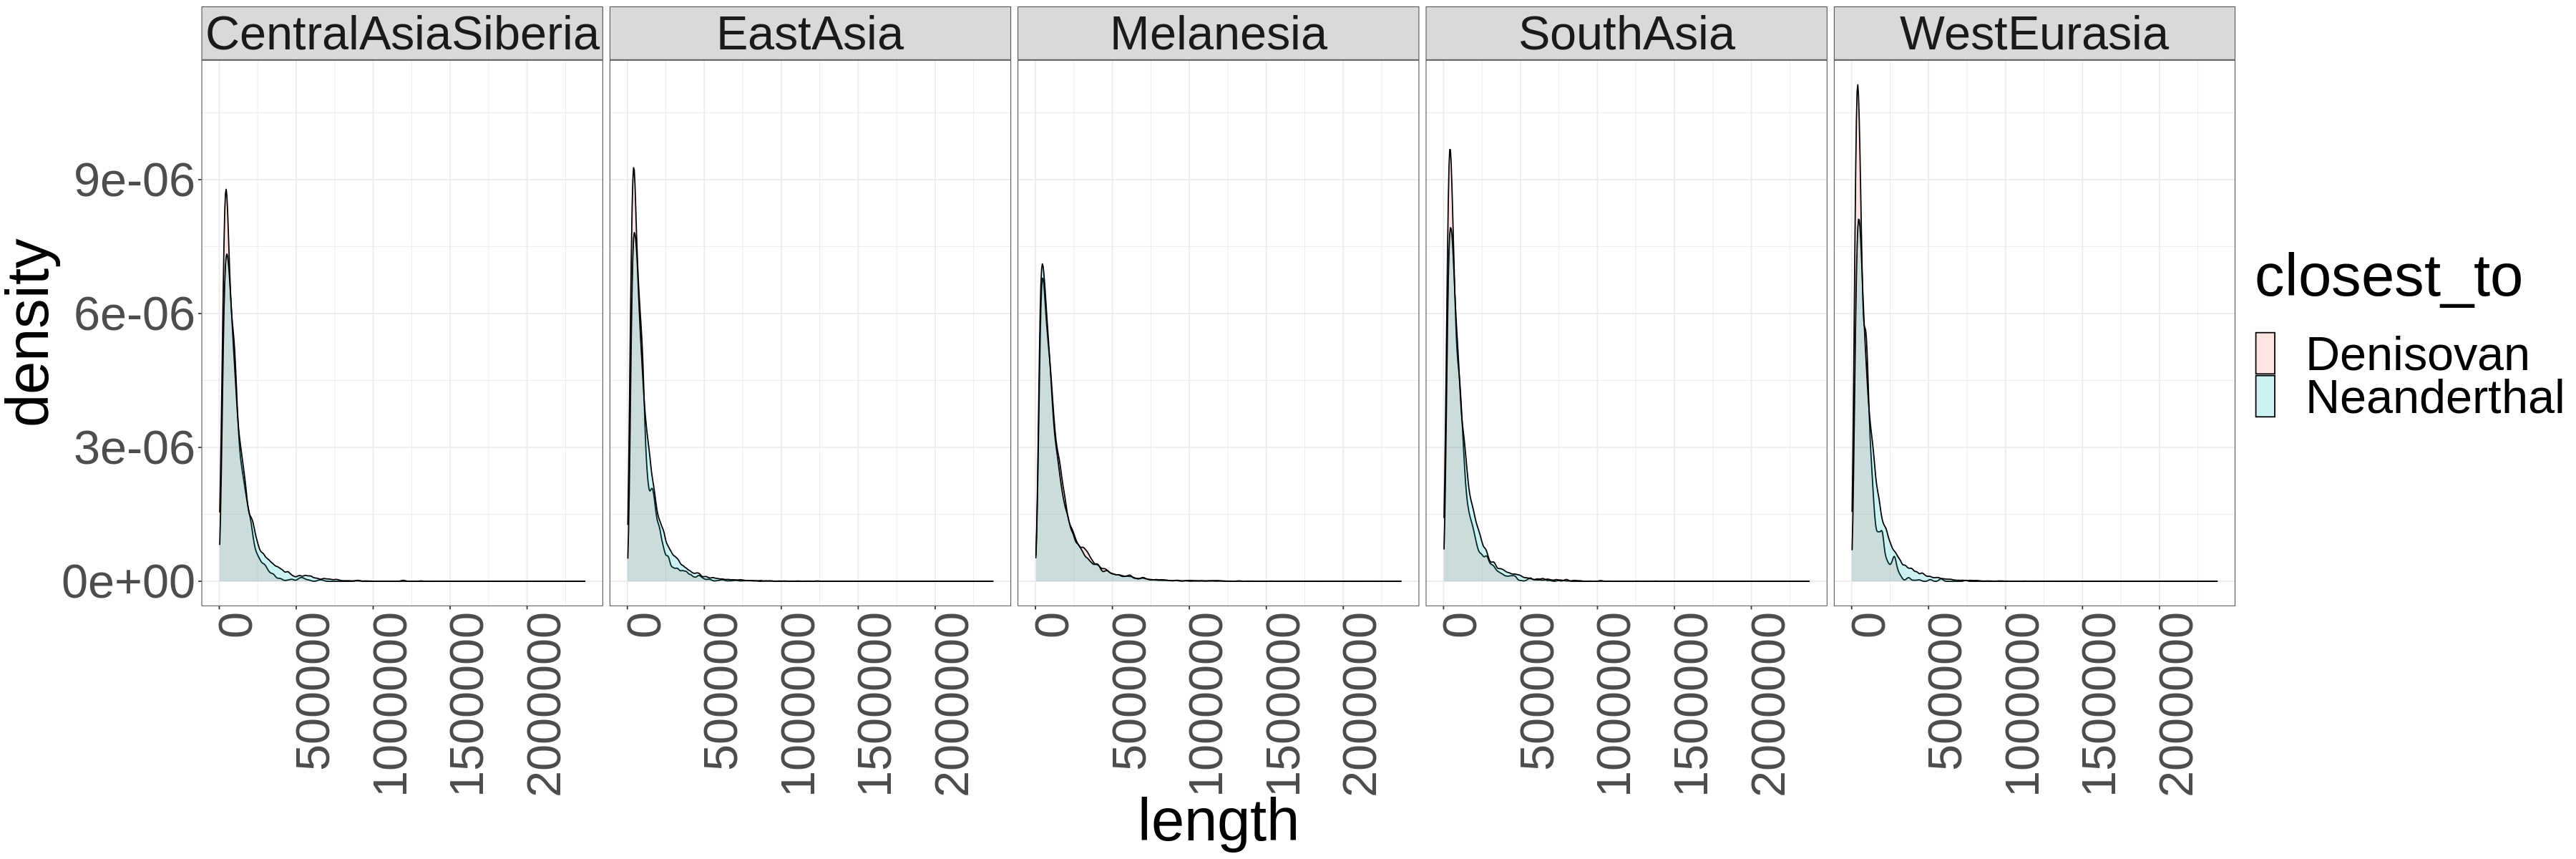

In [47]:
options(repr.plot.width=30, repr.plot.height=10)

archaic_df %>%
    filter(closest_to %in% c("Neanderthal","Denisovan")) %>%
    ggplot() +
        geom_density(aes(length, fill=closest_to),alpha=0.2) +
        theme_bw() + facet_grid(~region) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))

When interpreting these values, we should also take into account the number of fragments and samples for each population

In [62]:
archaic_df %>%
    filter(closest_to %in% c("Neanderthal","Denisovan")) %>%
    group_by(closest_to,region) %>%
    summarise(median_fragment_length = median(length), count = n(), samples = length(unique(name)))

`summarise()` has grouped output by 'closest_to'. You can override using the `.groups` argument.



closest_to  region             median_fragment_length count samples
1  Denisovan   CentralAsiaSiberia  76000                  1301  27    
2  Denisovan   EastAsia            74000                  8455 132    
3  Denisovan   Melanesia          102000                 45153  89    
4  Denisovan   SouthAsia           70000                  2103  39    
5  Denisovan   WestEurasia         61000                  1733  71    
6  Neanderthal CentralAsiaSiberia  91000                 12619  27    
7  Neanderthal EastAsia            89000                 67005 132    
8  Neanderthal Melanesia           96000                 44713  89    
9  Neanderthal SouthAsia           86000                 16767  39    
10 Neanderthal WestEurasia         86000                 26101  71

We can see that the median fragment length (and the number of fragments) for the Denisovans is higher in Melanesian samples, consistent with a more recent admixture with Denisovan archaics. The Denisovan fragment lengths in EastAsians, CentralAsiaSiberia aand South Asians, are longer than WestEurasians, but not markedly longer, we also have less Denisovan fragments than for Papuans. Finally, we can see that the median length of Neanderthal fragments is similar, consistent with a common Neanderthal admixture event.

In [44]:
quantile((archaic_df %>% 
         filter(closest_to %in% c("Neanderthal","Denisovan")))$length)

0%     25%     50%     75%    100% 
   3000   52000   91000  164000 2375000

In [46]:
quantile((archaic_df %>% 
         filter(closest_to %in% c("Neanderthal","Denisovan")) %>%
         mutate(total_snps = Shared_with_Altai + Shared_with_Denisova + Shared_with_Vindija))$total_snps)

0%  25%  50%  75% 100% 
   1    9   19   36  561

So as to clean a bit the fragments, we can apply a constraint on the minimum number of overlapping SNPs. We'll choose as a theshold median number of overlapping SNPs.

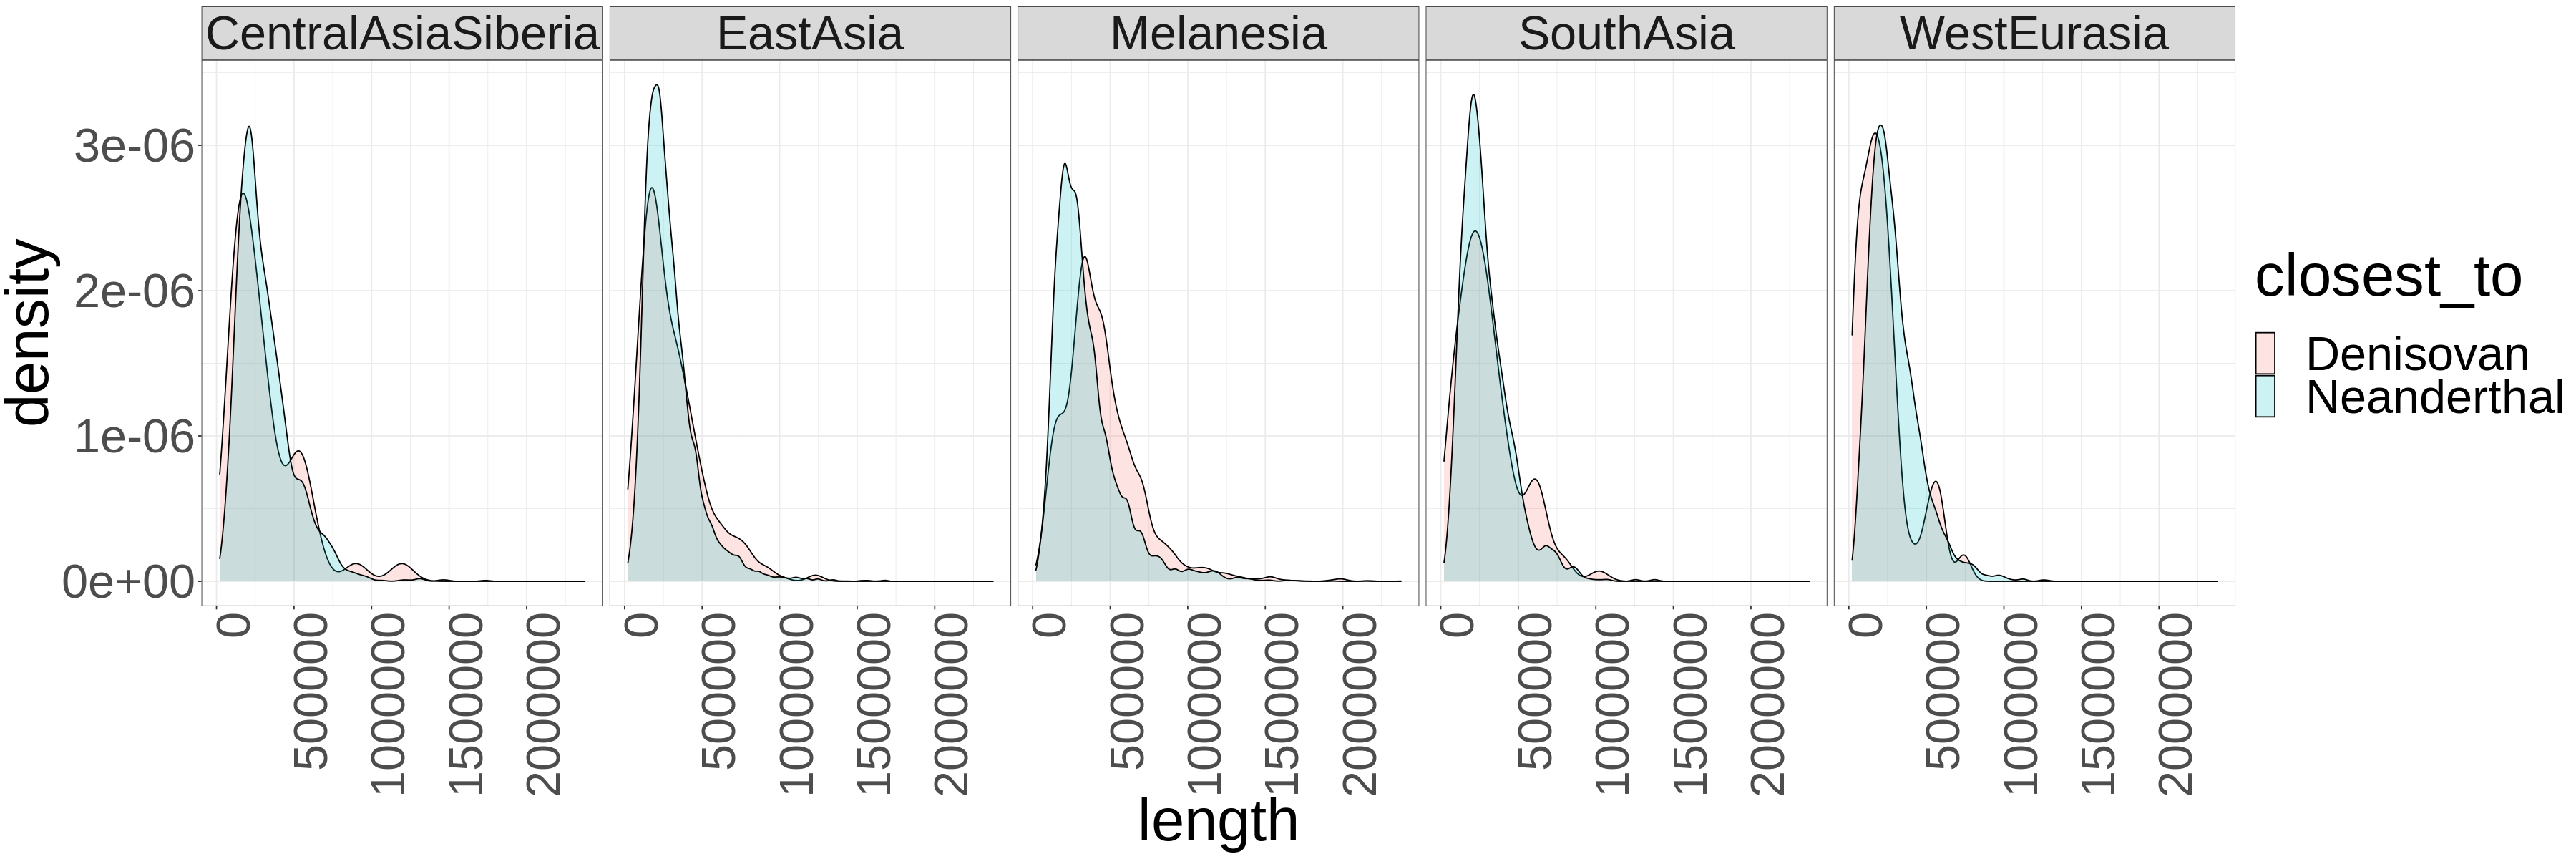

In [40]:
options(repr.plot.width=30, repr.plot.height=10)

archaic_df %>%
    filter(closest_to %in% c("Neanderthal","Denisovan")) %>%
    mutate(total_snps = Shared_with_Altai + Shared_with_Denisova + Shared_with_Vindija) %>%
    filter(total_snps > 19) %>%
    ggplot() +
        geom_density(aes(length, fill=closest_to),alpha=0.2) +
        theme_bw() + facet_grid(~region) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))

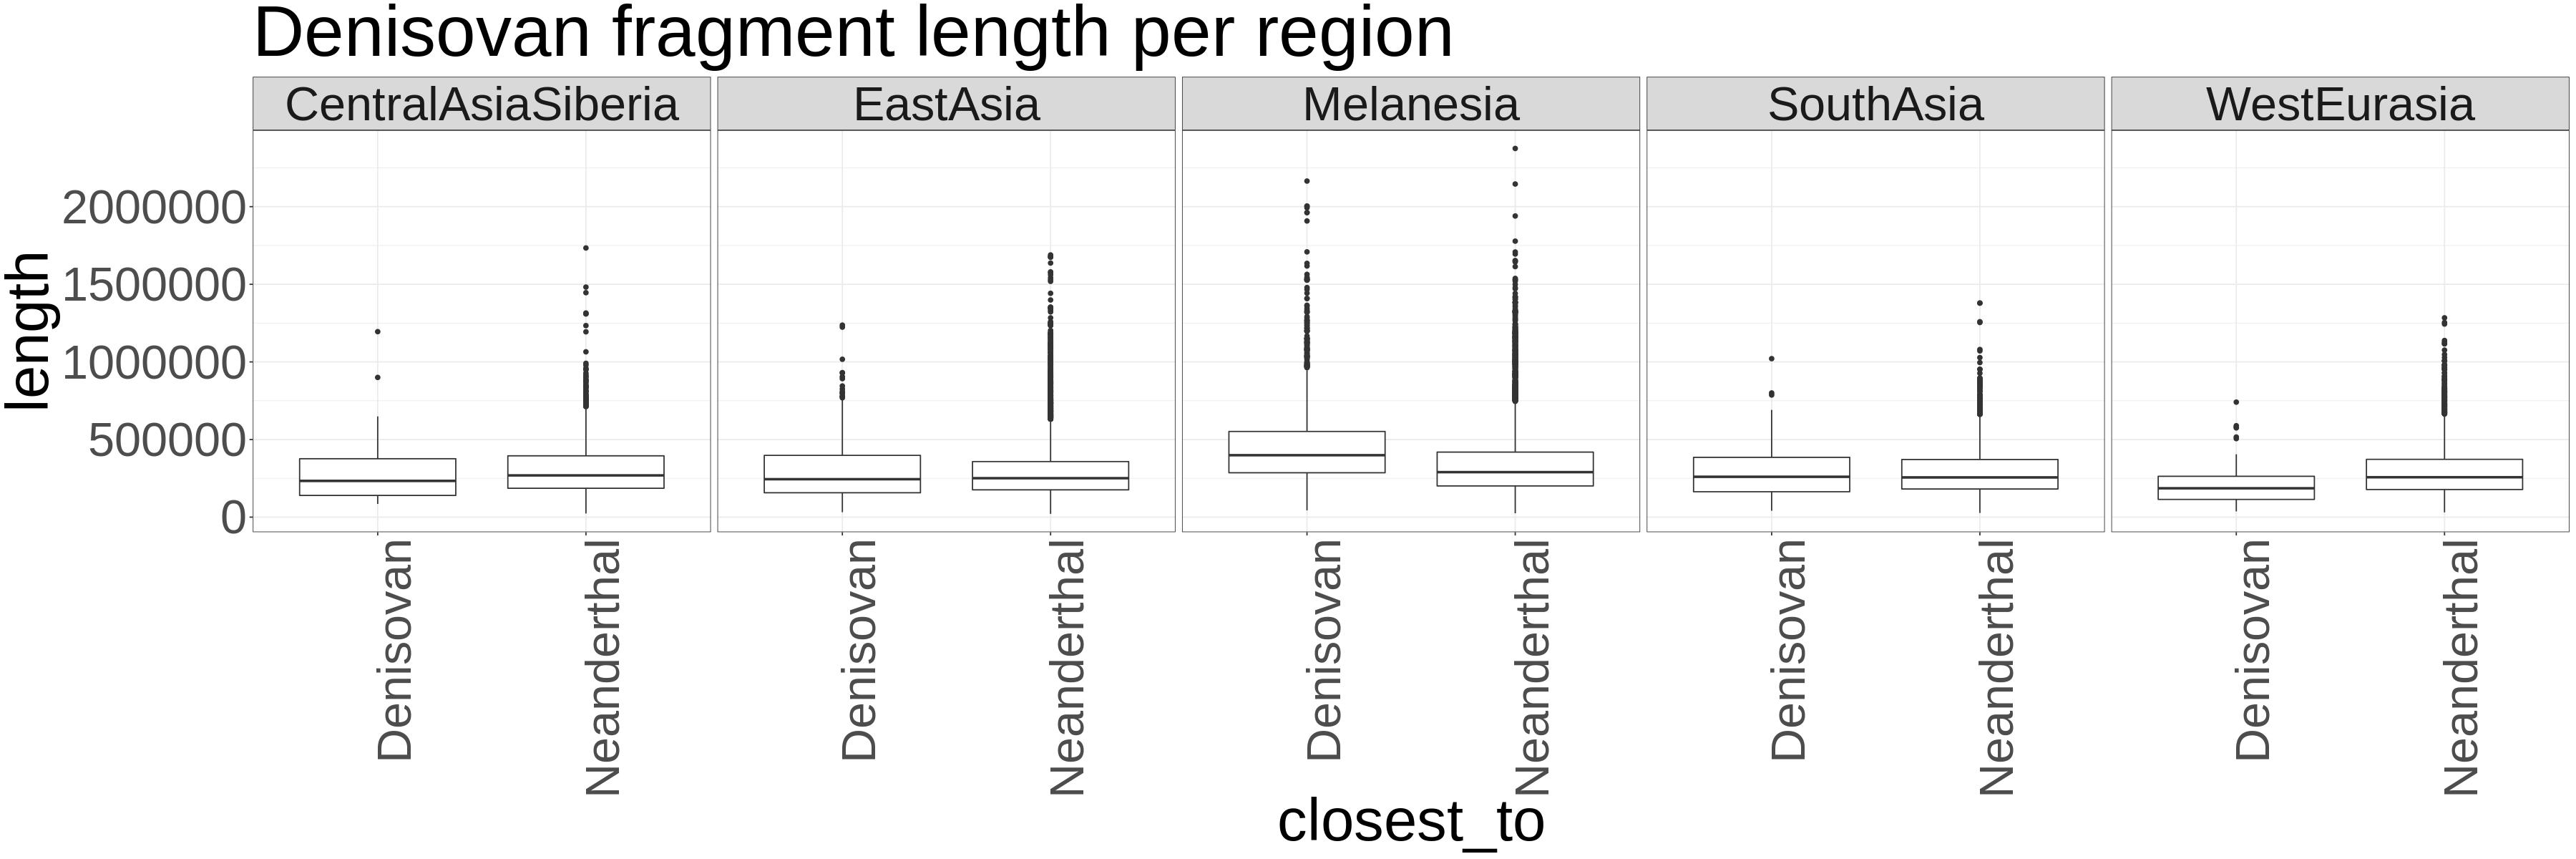

In [41]:
archaic_df %>% 
    filter(closest_to %in% c("Neanderthal","Denisovan")) %>%
    mutate(total_snps = Shared_with_Altai + Shared_with_Denisova + Shared_with_Vindija) %>%
    filter(total_snps > 50) %>%
    ggplot(aes(x=closest_to,y=length)) +
        geom_boxplot() +
        ggtitle('Denisovan fragment length per region') +
        theme_bw() + 
        facet_grid(~region) +
        scale_x_discrete() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))

#### b. How does this compare to the fragment size distribution of the fragments that could not be assigned to archaic origin (these are removed from the Cell paper analyses). Discuss reasons for the differences.


In [68]:
archaic_df  %>%
    filter(closest_to == "Neanderthal") %>%
    group_by(region) %>%
    ggplot(aes(length)) +
        geom_histogram(bins = 50) +
        ggtitle('Neanderthal fragment length per region') +
        theme_bw() + facet_grid(~region) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50)) -> plot1

archaic_df  %>%
    filter(closest_to == "Denisovan") %>%
    ggplot(aes(length)) +
        geom_histogram(bins = 50) +
        ggtitle('Denisovan fragment length per region') +
        theme_bw() + facet_grid(~region)  +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50)) -> plot2

archaic_df  %>%
    filter(closest_to == "Unclassified") %>%
    group_by(region) %>%
    ggplot(aes(length)) +
        geom_histogram(bins = 50) +
        ggtitle('Unclassified fragment length per region') +
        theme_bw() + facet_grid(~region) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50)) -> plot3

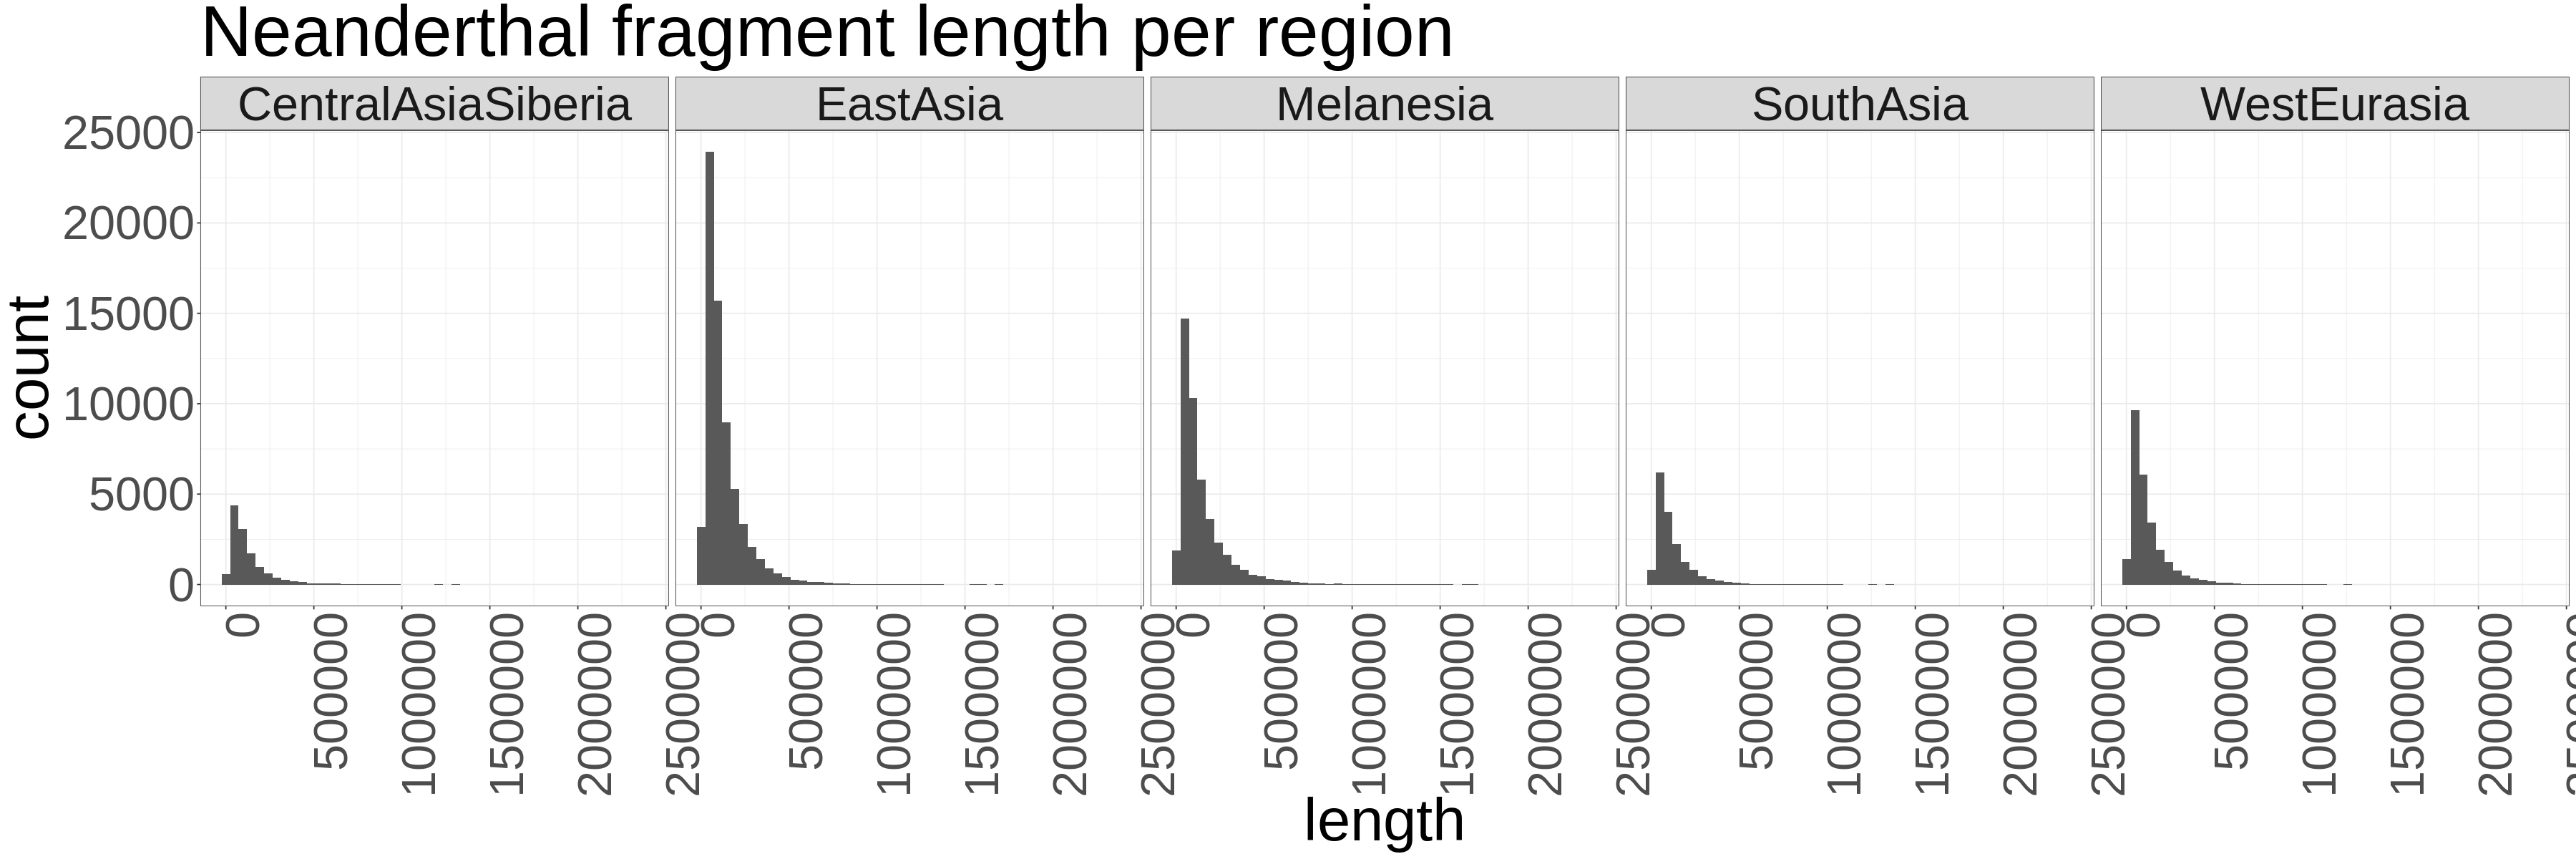

In [69]:
plot1

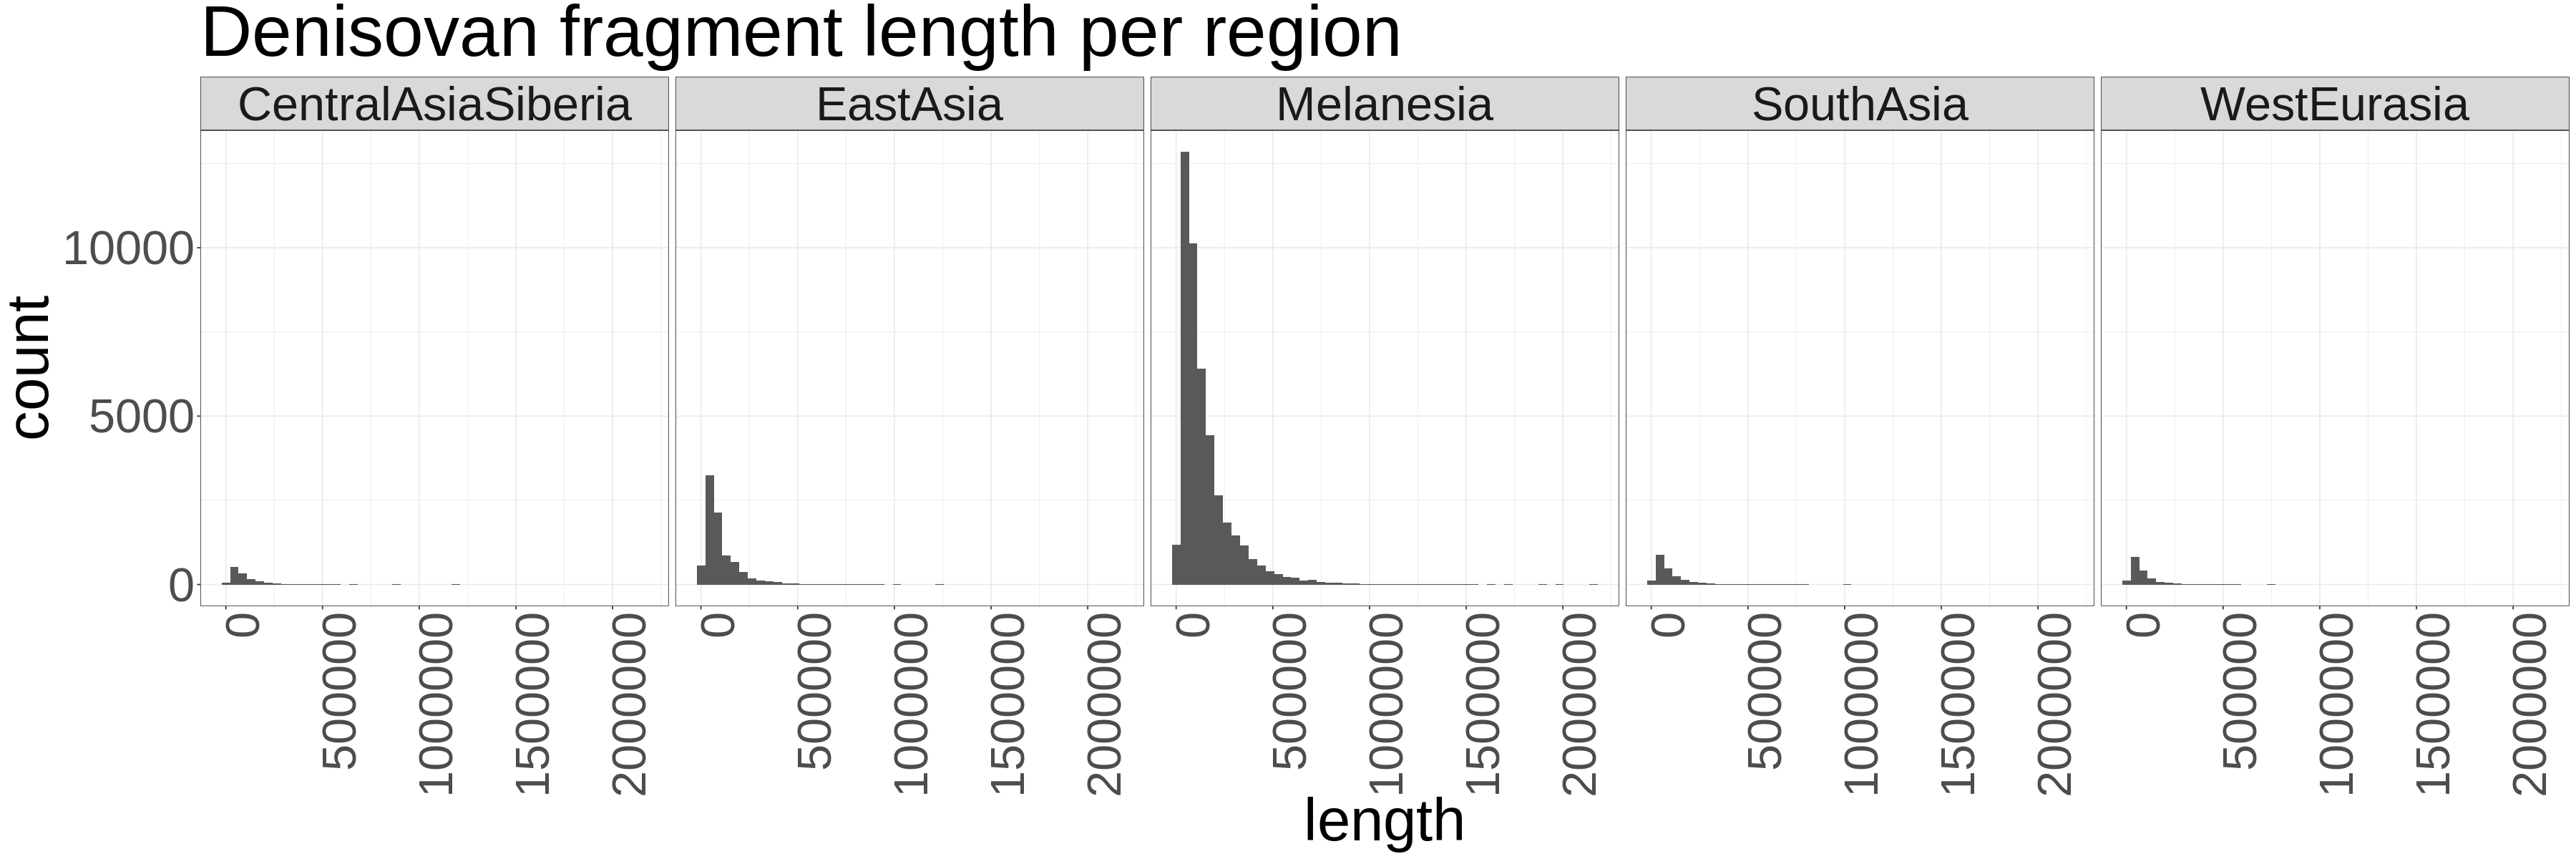

In [70]:
plot2

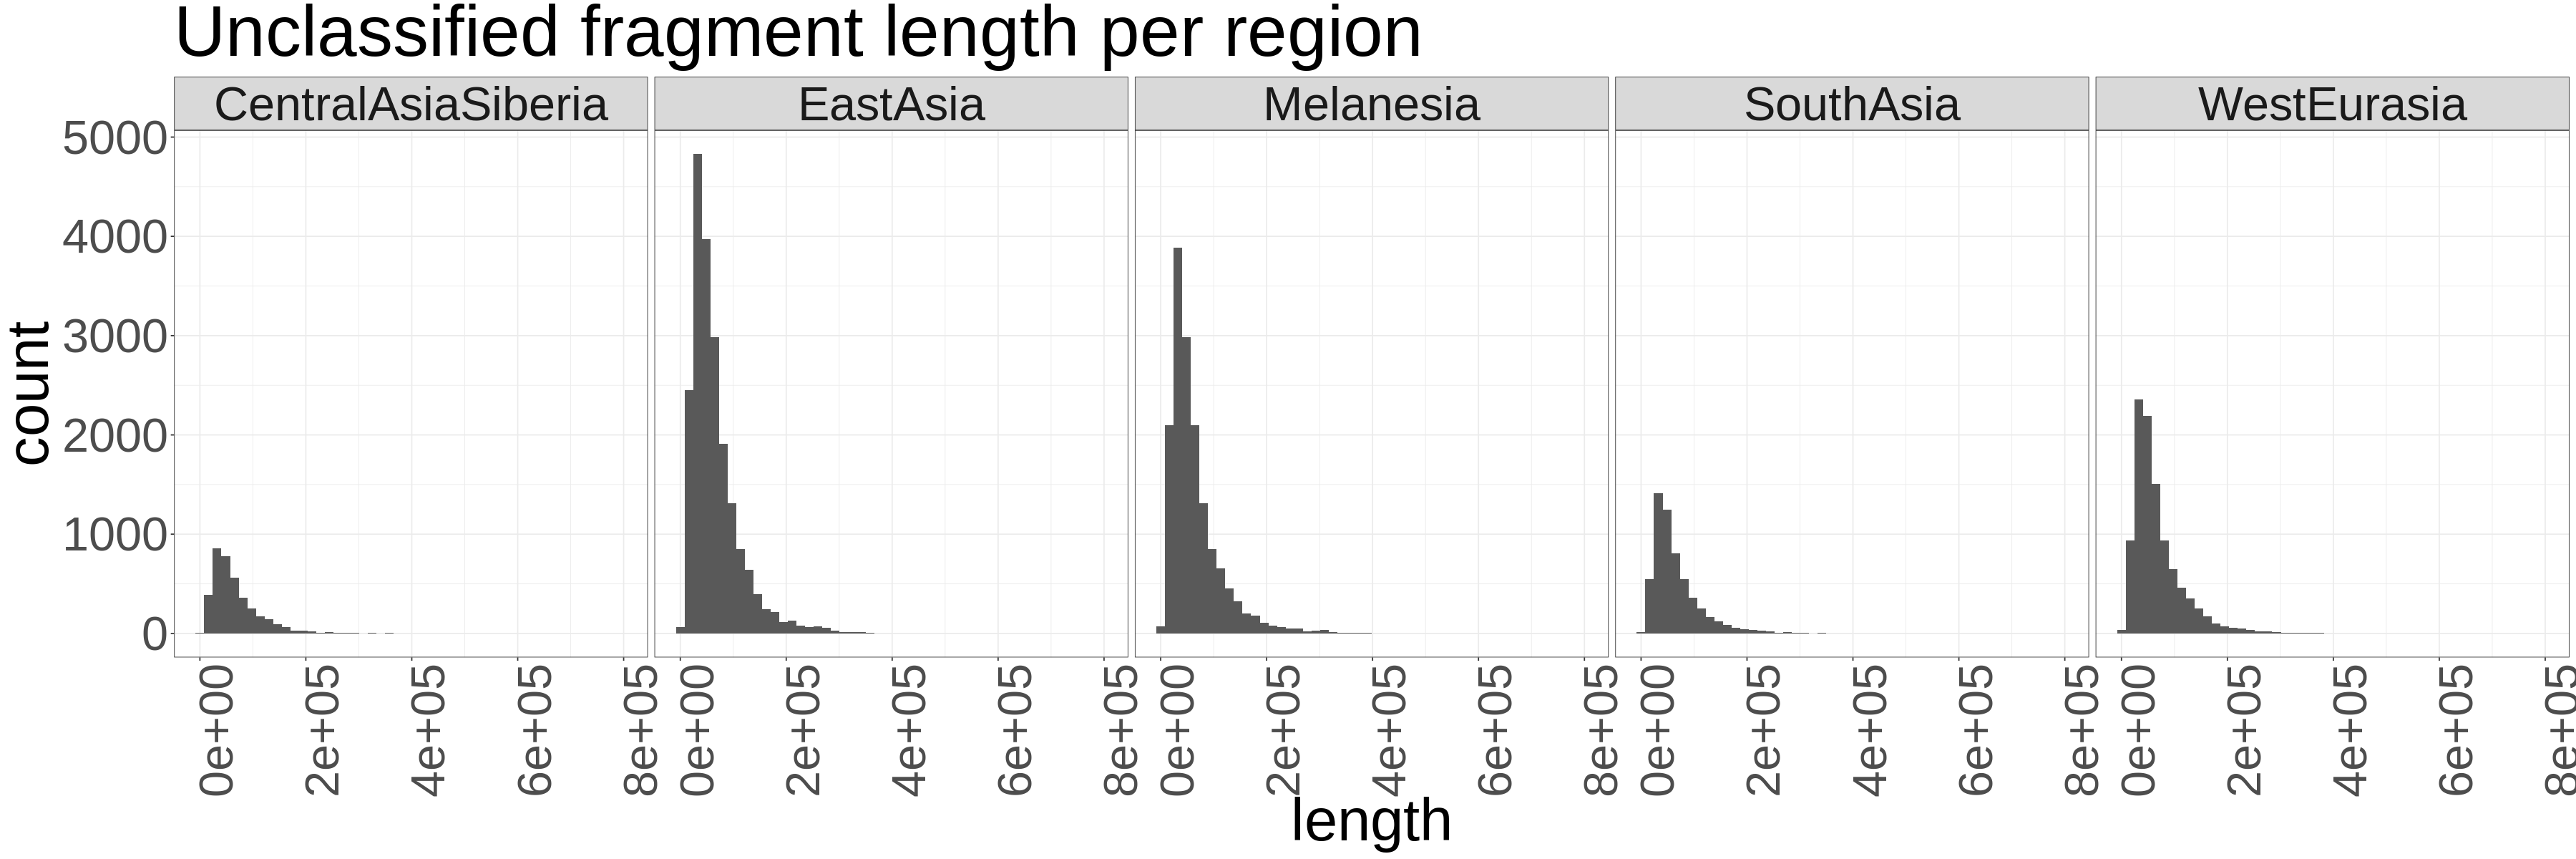

In [71]:
plot3

## Comparison of chromosomes

#### Q1. Determine the amount of archaic introgression on each chromosome for each of the five regions.

`summarise()` has grouped output by 'chrom'. You can override using the `.groups` argument.



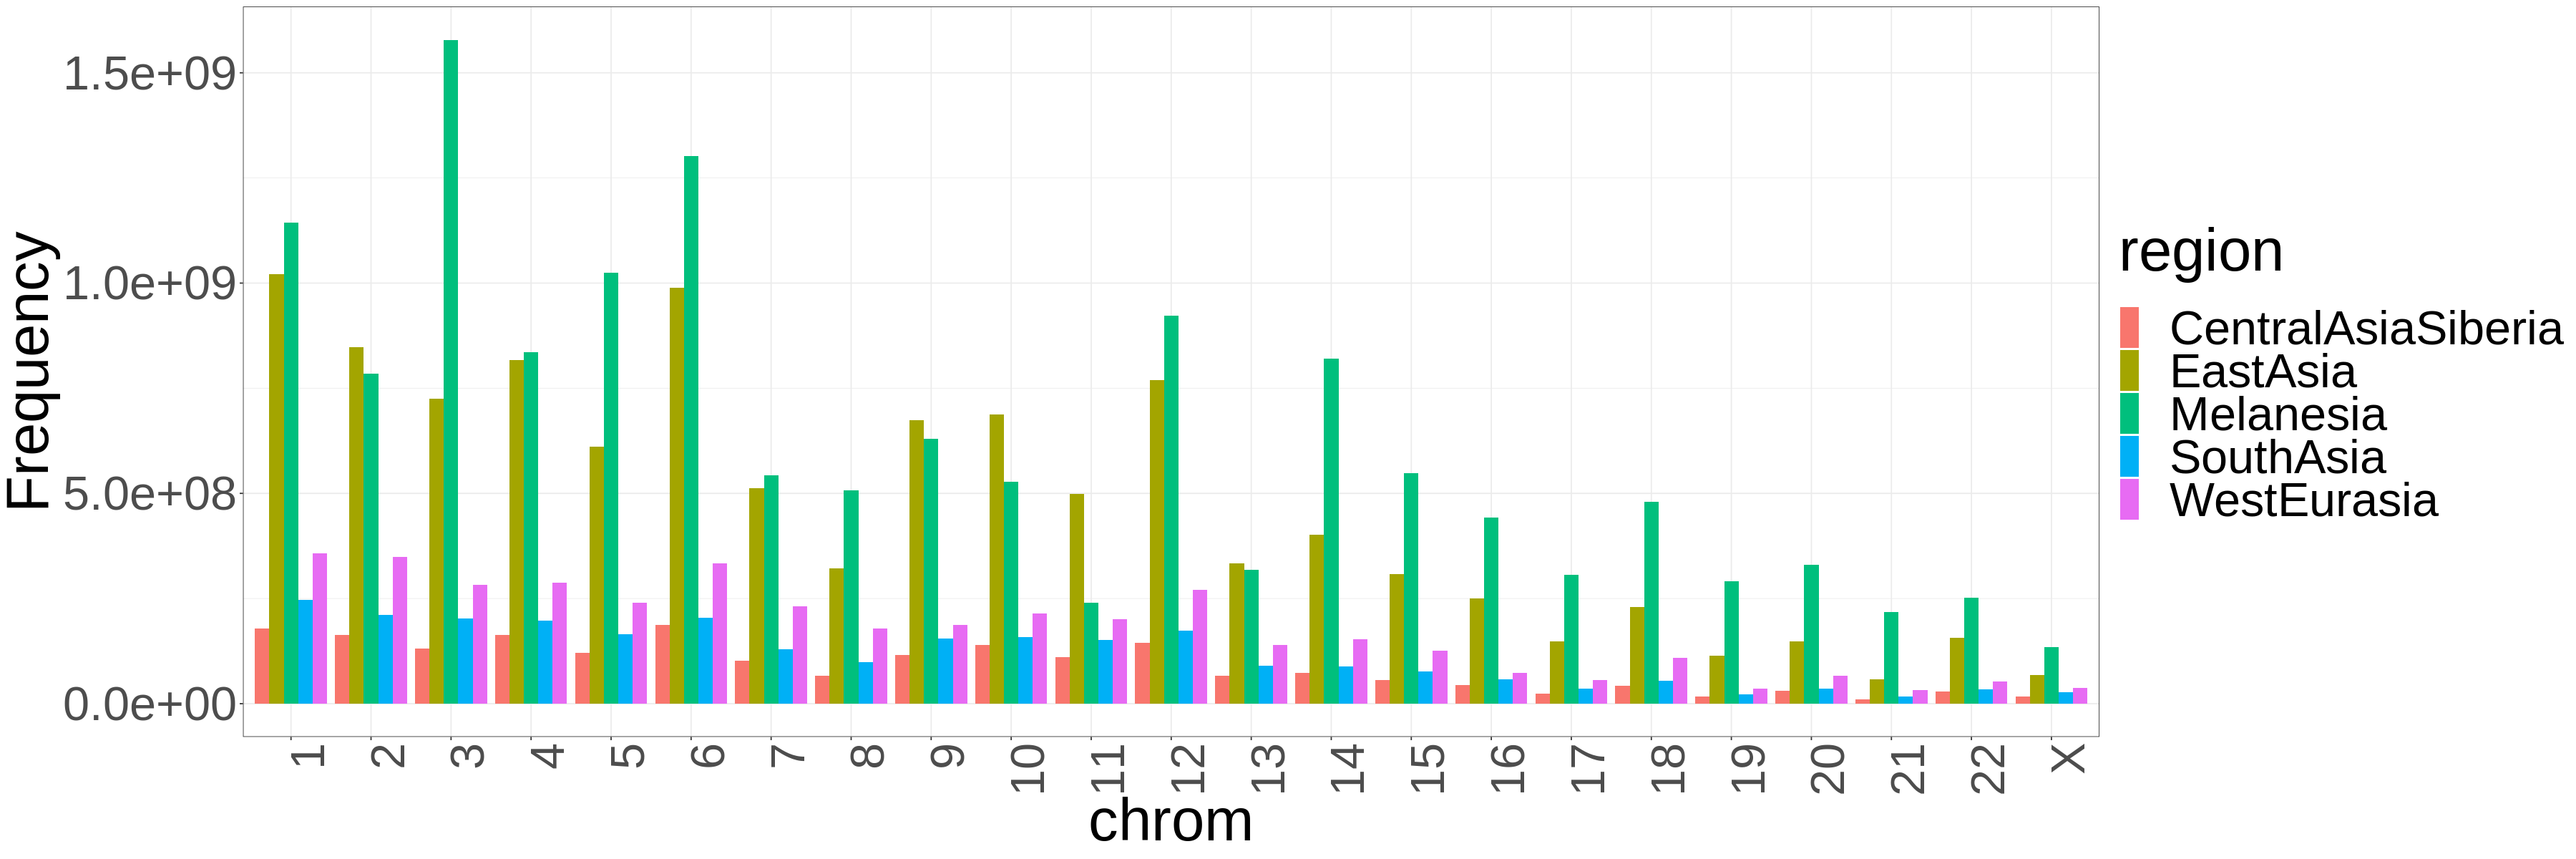

In [44]:
archaic_df  %>%
    group_by(chrom, region) %>%
    summarise(Frequency = sum(as.numeric(length))) %>%
    ggplot(aes(x = chrom, y = Frequency, fill = region)) +  
        geom_bar(position = "dodge", stat="identity") +
        theme_bw() +
        scale_x_discrete(limits= c(seq(1, 22, 1),'X')) + # ordering from 1 to 22 +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))


#### Q2. Repeat this with assignment of regions to archaic species.

`summarise()` has grouped output by 'chrom'. You can override using the `.groups` argument.



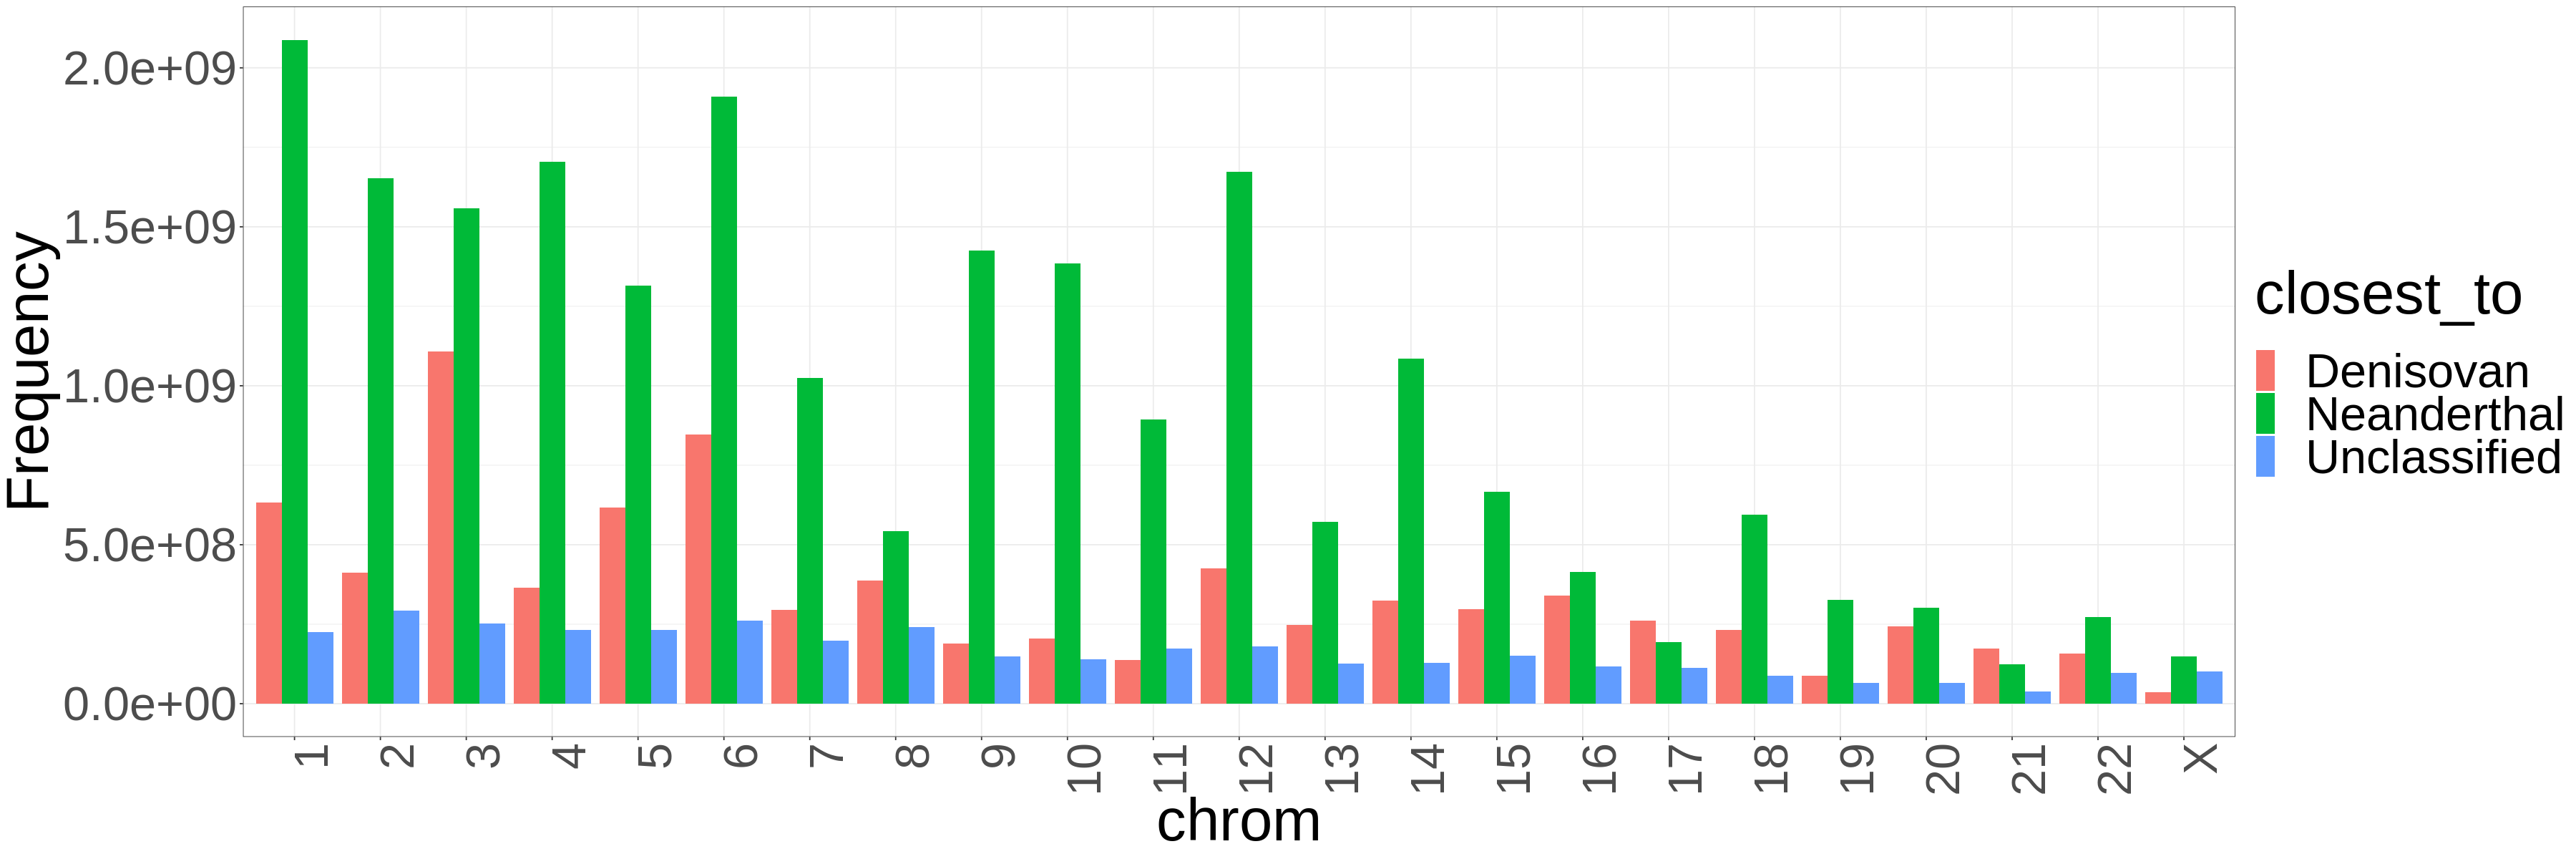

In [46]:
archaic_df  %>%
    group_by(chrom, closest_to) %>%
    summarise(Frequency = sum(as.numeric(length))) %>%
    ggplot(aes(x = chrom, y = Frequency, fill = closest_to)) +  
        geom_bar(position = "dodge", stat="identity") +
        theme_bw() +
        scale_x_discrete(limits= c(seq(1, 22, 1),'X')) + # ordering from 1 to 22
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))


#### Q3. Combine the Neanderthal fragments for all individuals and plot all the fragments on top of each other along chromosomes (hint use alpha = 0.1). Can you find “deserts” of archaic admixture and/or evidence for places where Neanderthal ancestry has reached very high frequency?

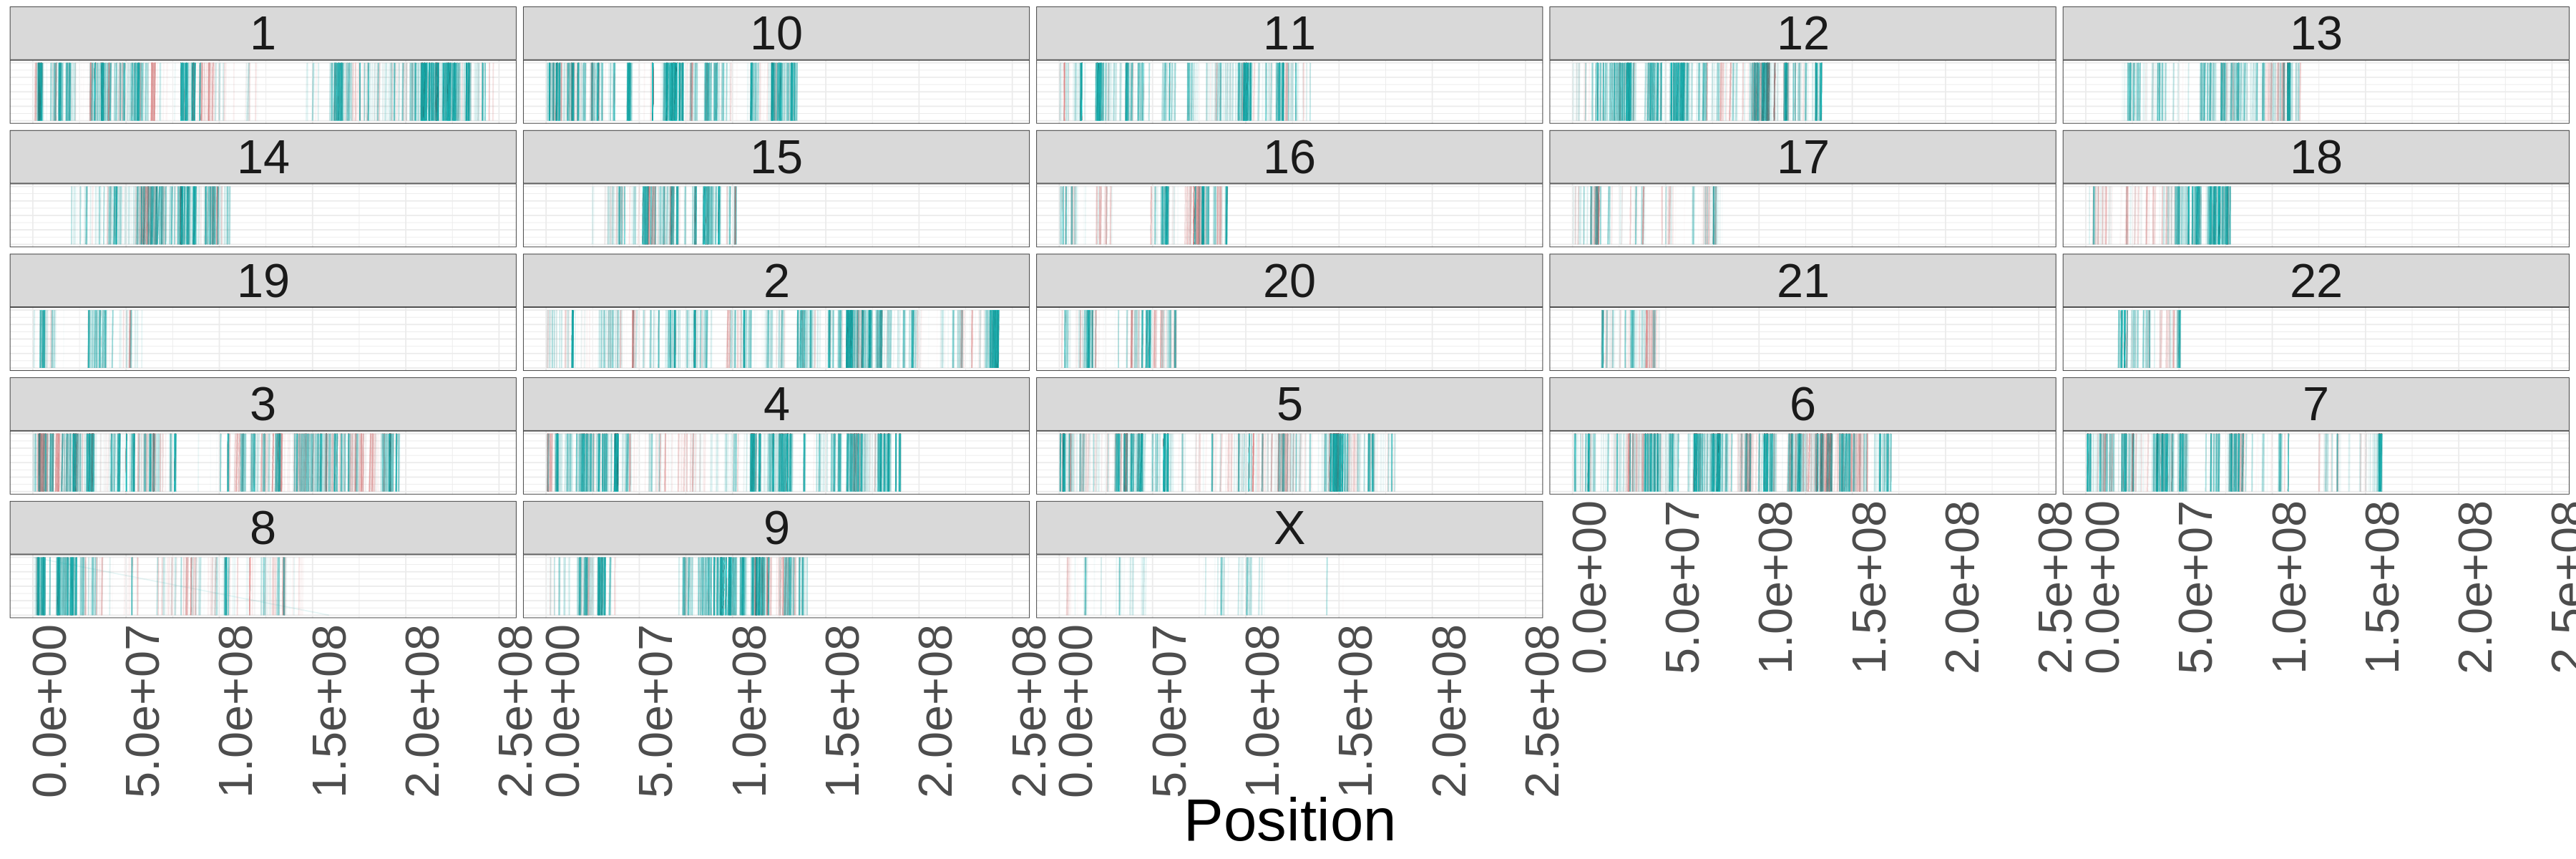

In [47]:
archaic_df %>%
    arrange(region) %>%
    ggplot() +
      theme_bw() + 
      geom_segment(aes(x=start,xend=end,y=0, yend=1, col=closest_to), alpha=0.02) + facet_wrap(~chrom) +
      theme(axis.text.x = element_text(angle = 90, hjust = 1),  axis.text.y=element_blank(),axis.ticks=element_blank(),axis.title.y=element_blank(),legend.position="none",text = element_text(size=50)) +
      xlab("Position")

#### Q4. You will find that the X chromosome is an outlier (compare to a chormosome of a similar size - chr8). How and why?

`summarise()` has grouped output by 'chrom'. You can override using the `.groups` argument.



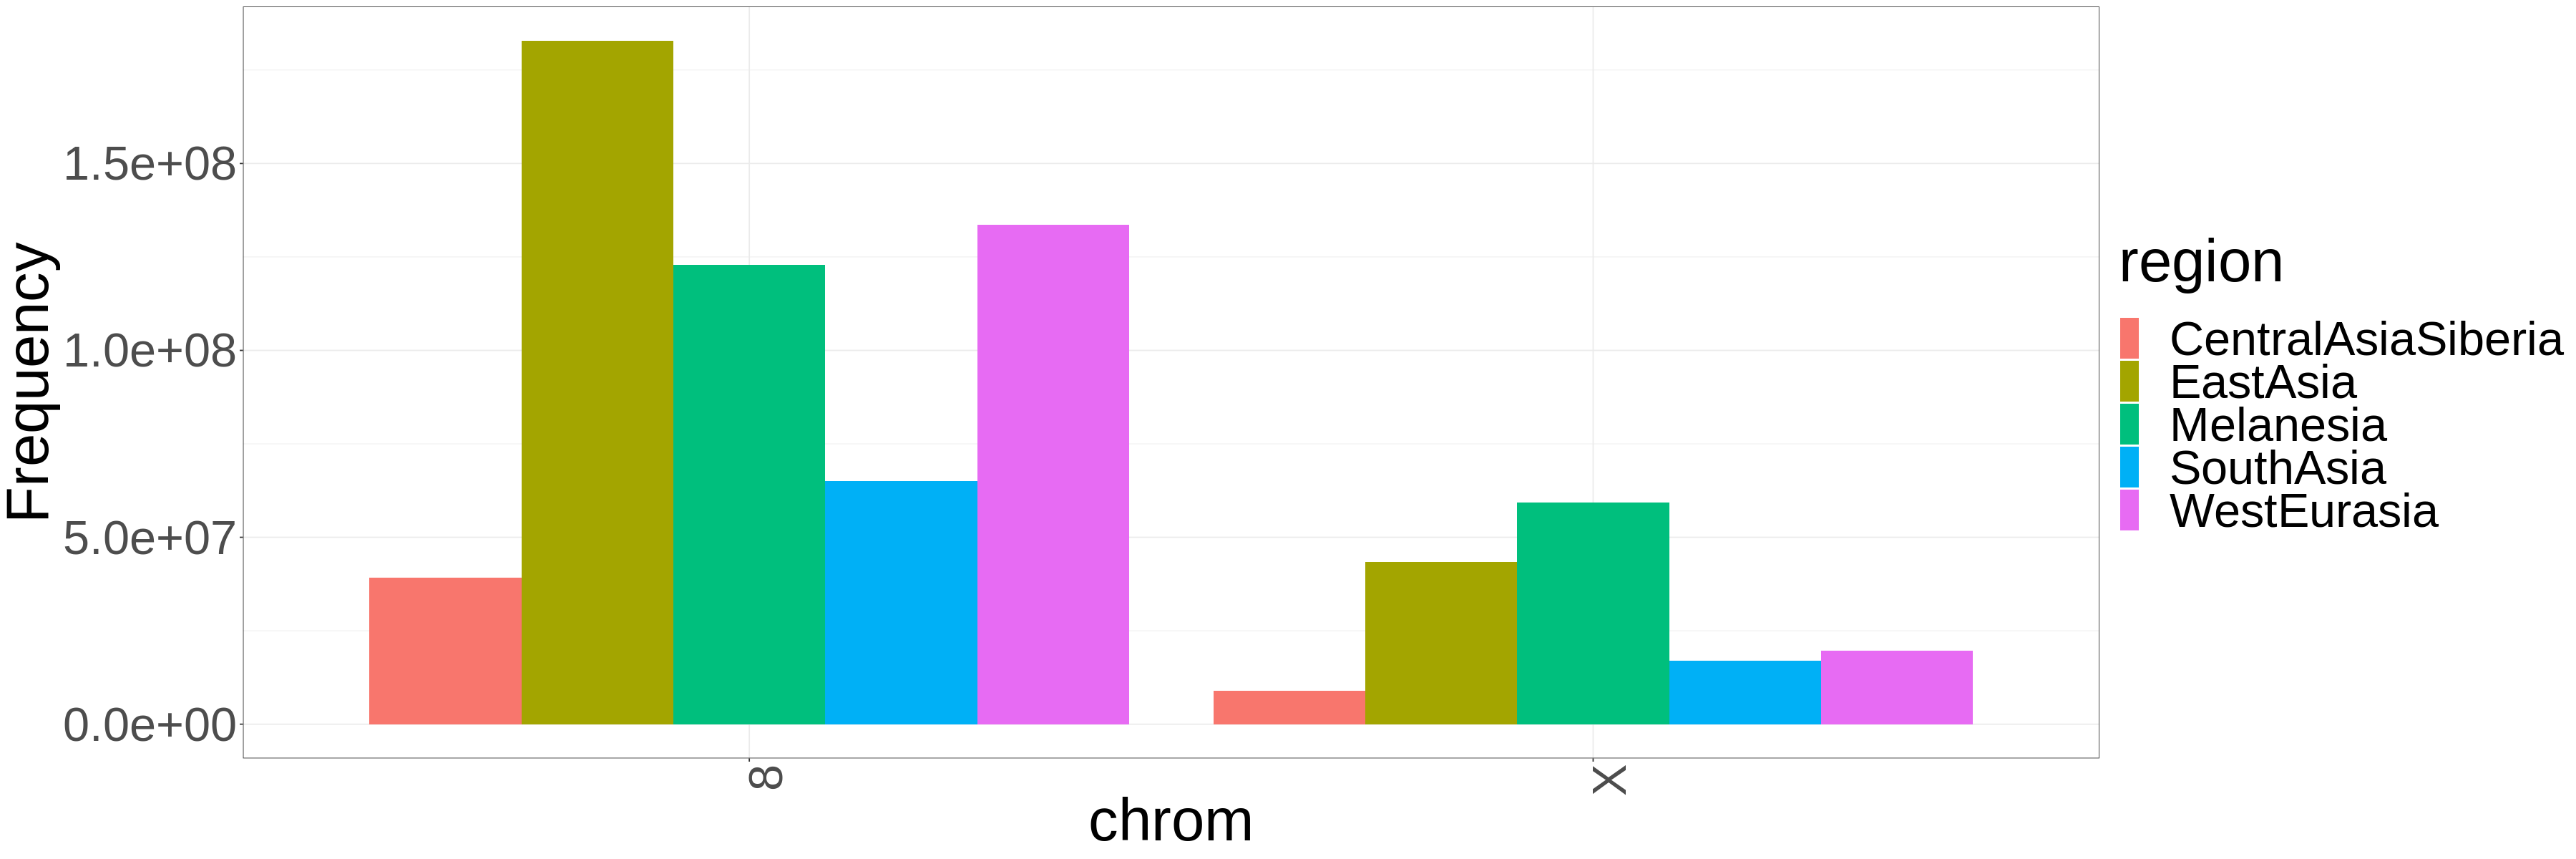

In [48]:
archaic_df %>%
    group_by(chrom, region) %>%
    filter(chrom %in% c('8', 'X')) %>%
    summarise(Frequency = sum(as.numeric(length))) %>%
    ggplot(aes(x = chrom, y = Frequency, fill = region)) +  
        geom_bar(position = "dodge", stat="identity") +
        theme_bw() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))

`summarise()` has grouped output by 'chrom'. You can override using the `.groups` argument.



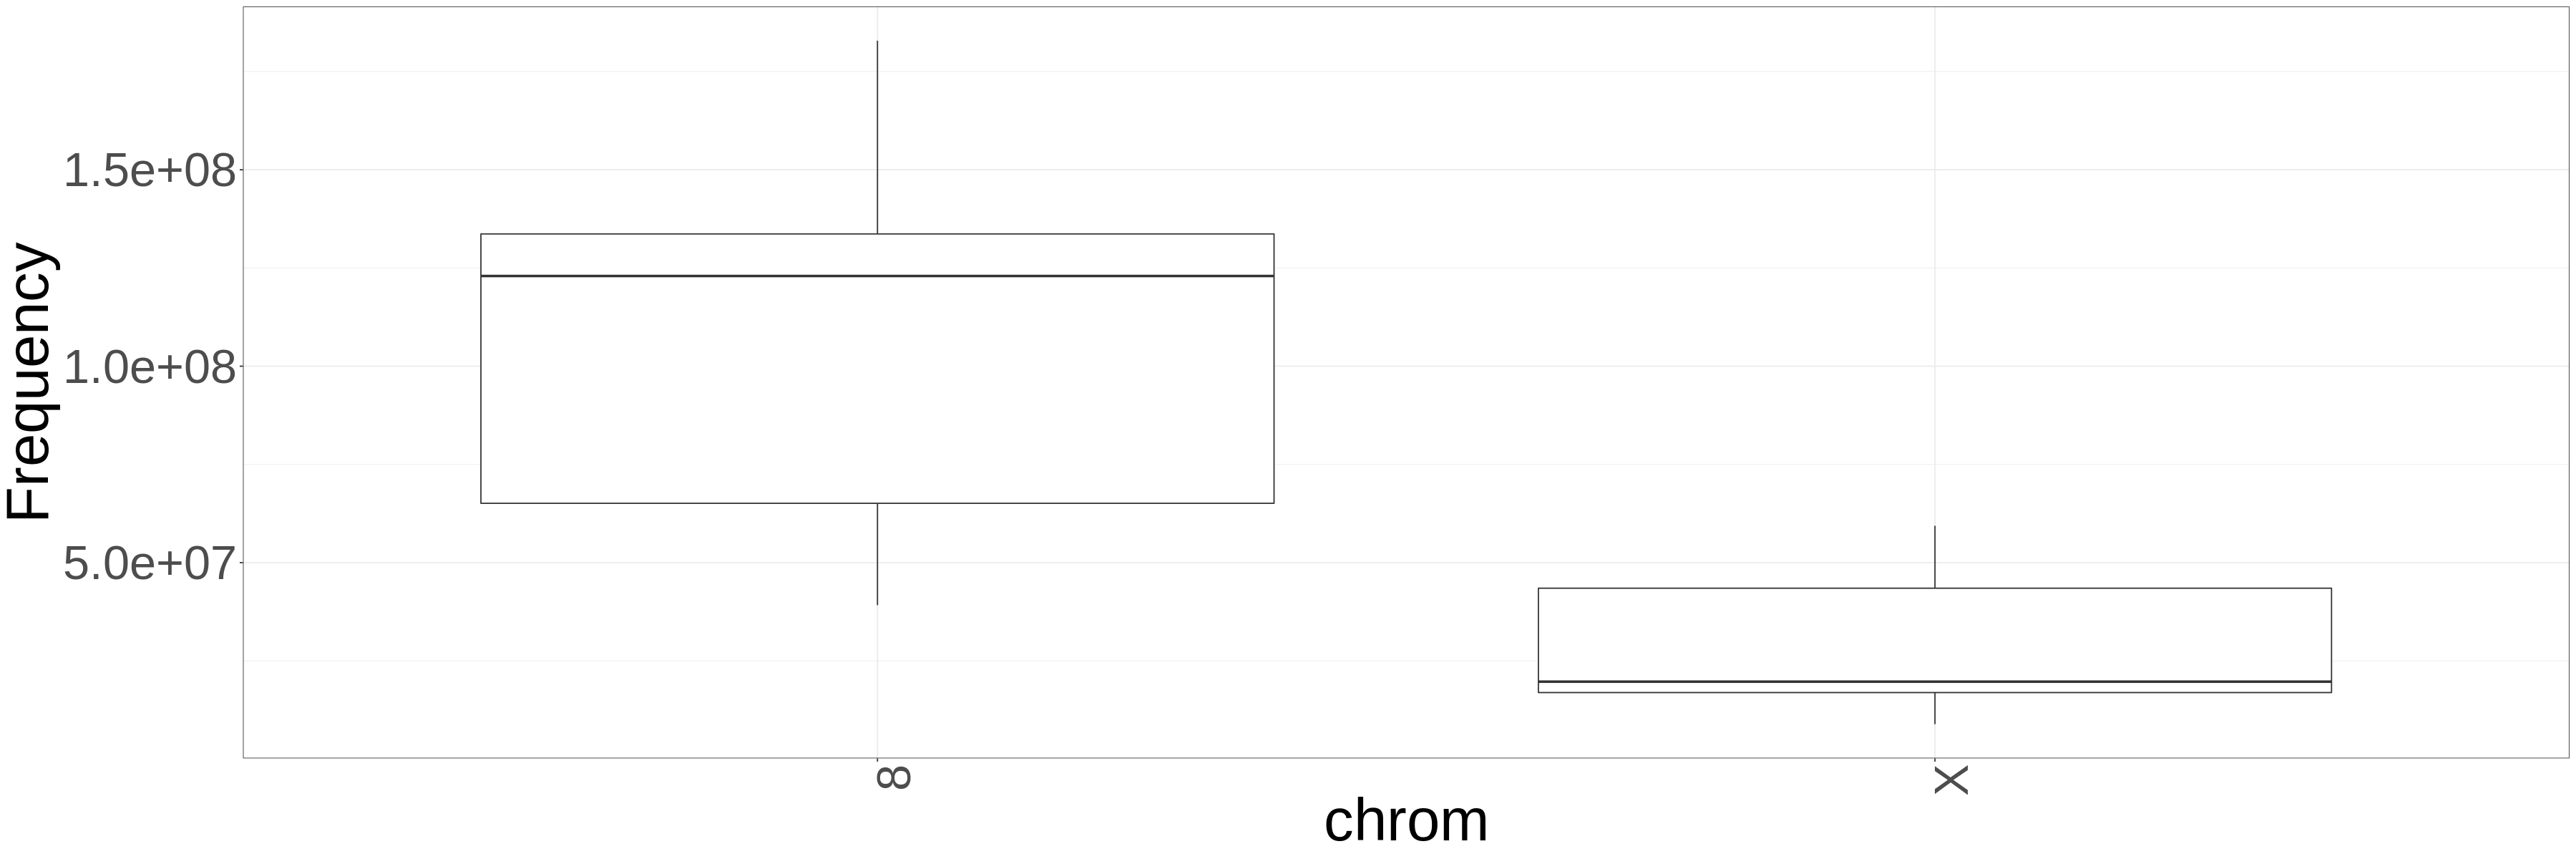

In [50]:
archaic_df %>%
    group_by(chrom, region) %>%
    filter(chrom %in% c('8', 'X')) %>%
    summarise(Frequency = sum(as.numeric(length))) %>%
    ggplot(aes(x = chrom, y = Frequency)) +  
        geom_boxplot() +
        theme_bw() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))

Sexual antagonistic effects acting on this chromosome, with possible effects on hybrid incompatibilities and speciation.

#### Q6. Do you find regions that are devoid of introgression for both the Neanderthal and the Denisovan admixture events?

Looking at the EPAS1 as an example of adaptive introgression. This gene maps to chr2:46,520,806-46,613,842 in GRCh37 coordinates.  Tibetan individuals have an increased amount of archaic polymorphism in this region. 


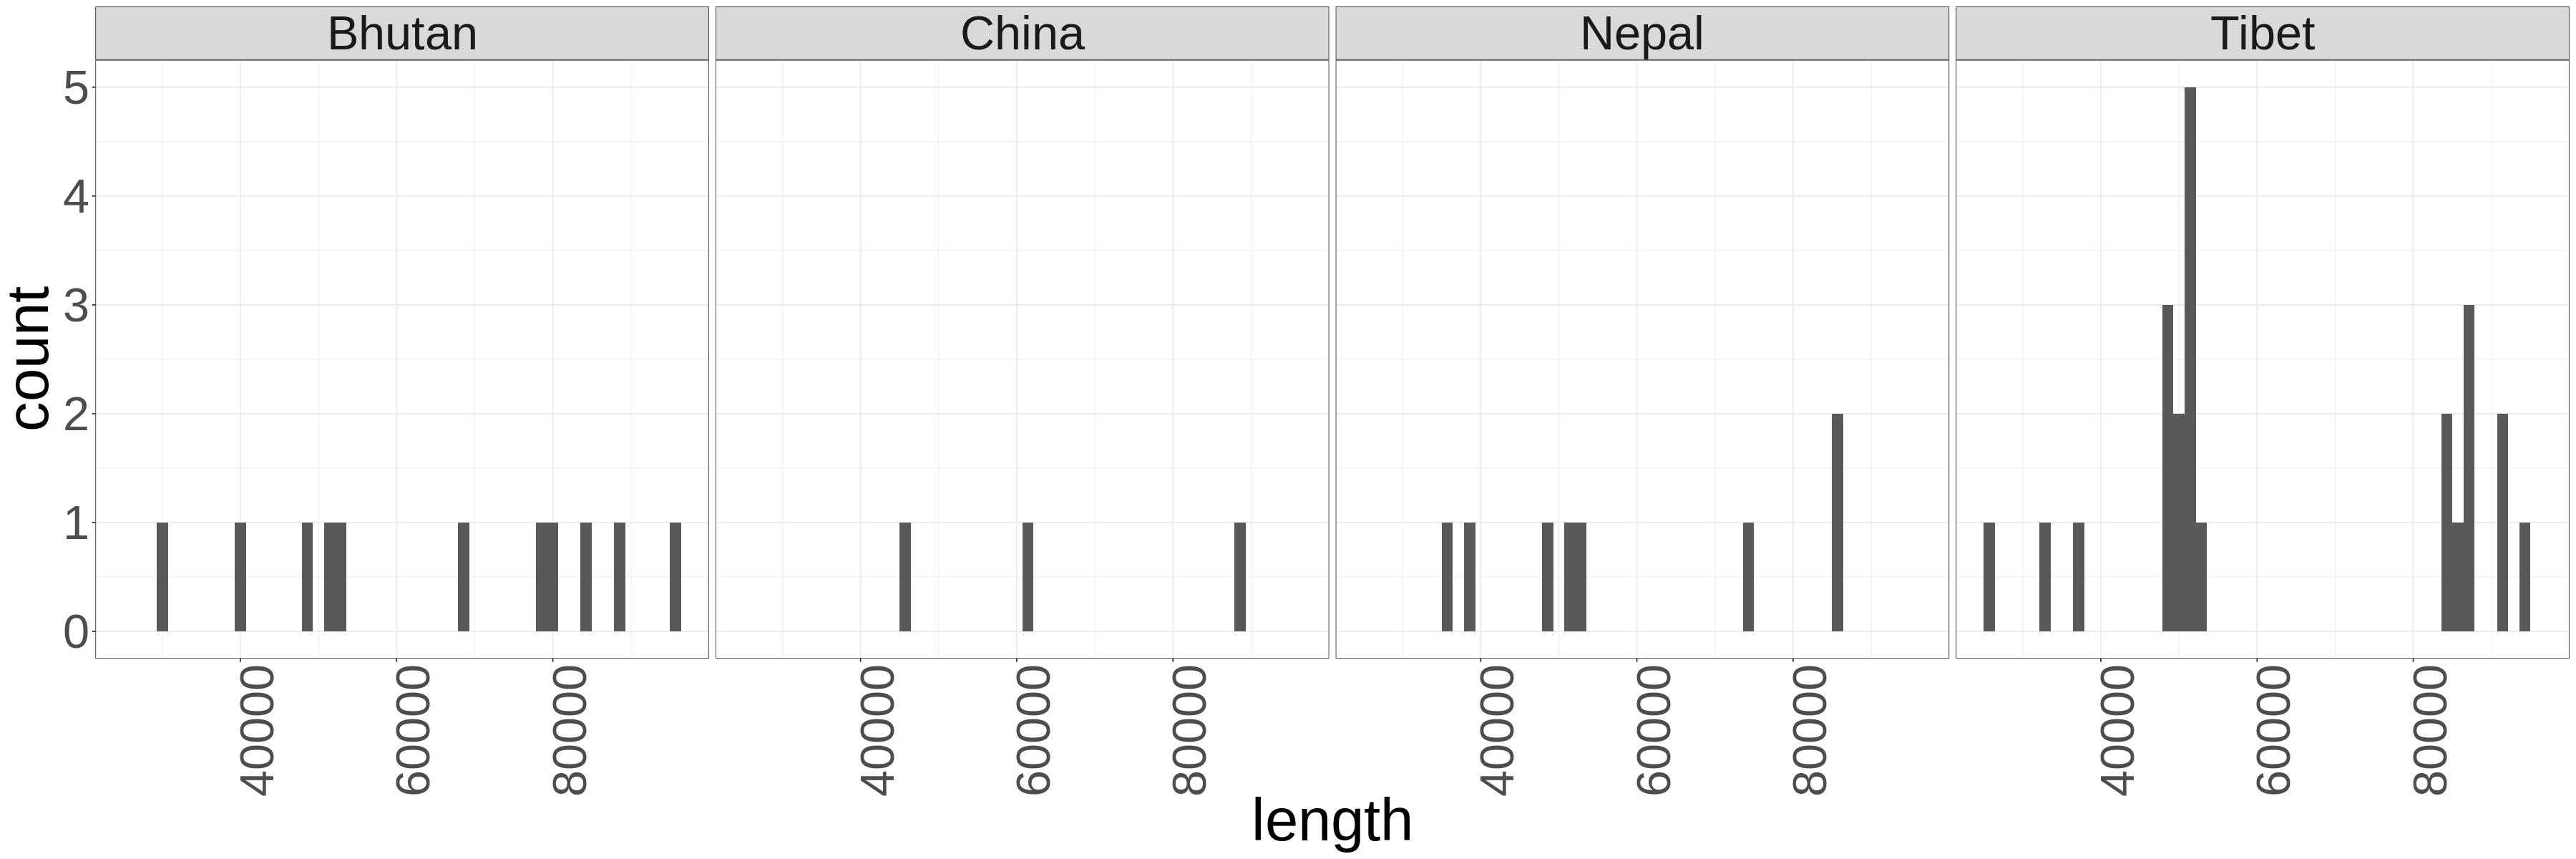

In [54]:

archaic_df %>%
    filter(closest_to == "Denisovan") %>%
    filter(chrom == 2 & region == 'EastAsia' & start > 46500000 & end < 46700000 ) %>%
    ggplot((aes(x = length))) + theme_bw() +
        geom_histogram(bins = 50) + facet_grid(~country) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))

Contrary, FOXP2 is an example of maladaptive introgression, consistent with the presence of deserts of archaic origin in around this gene. 


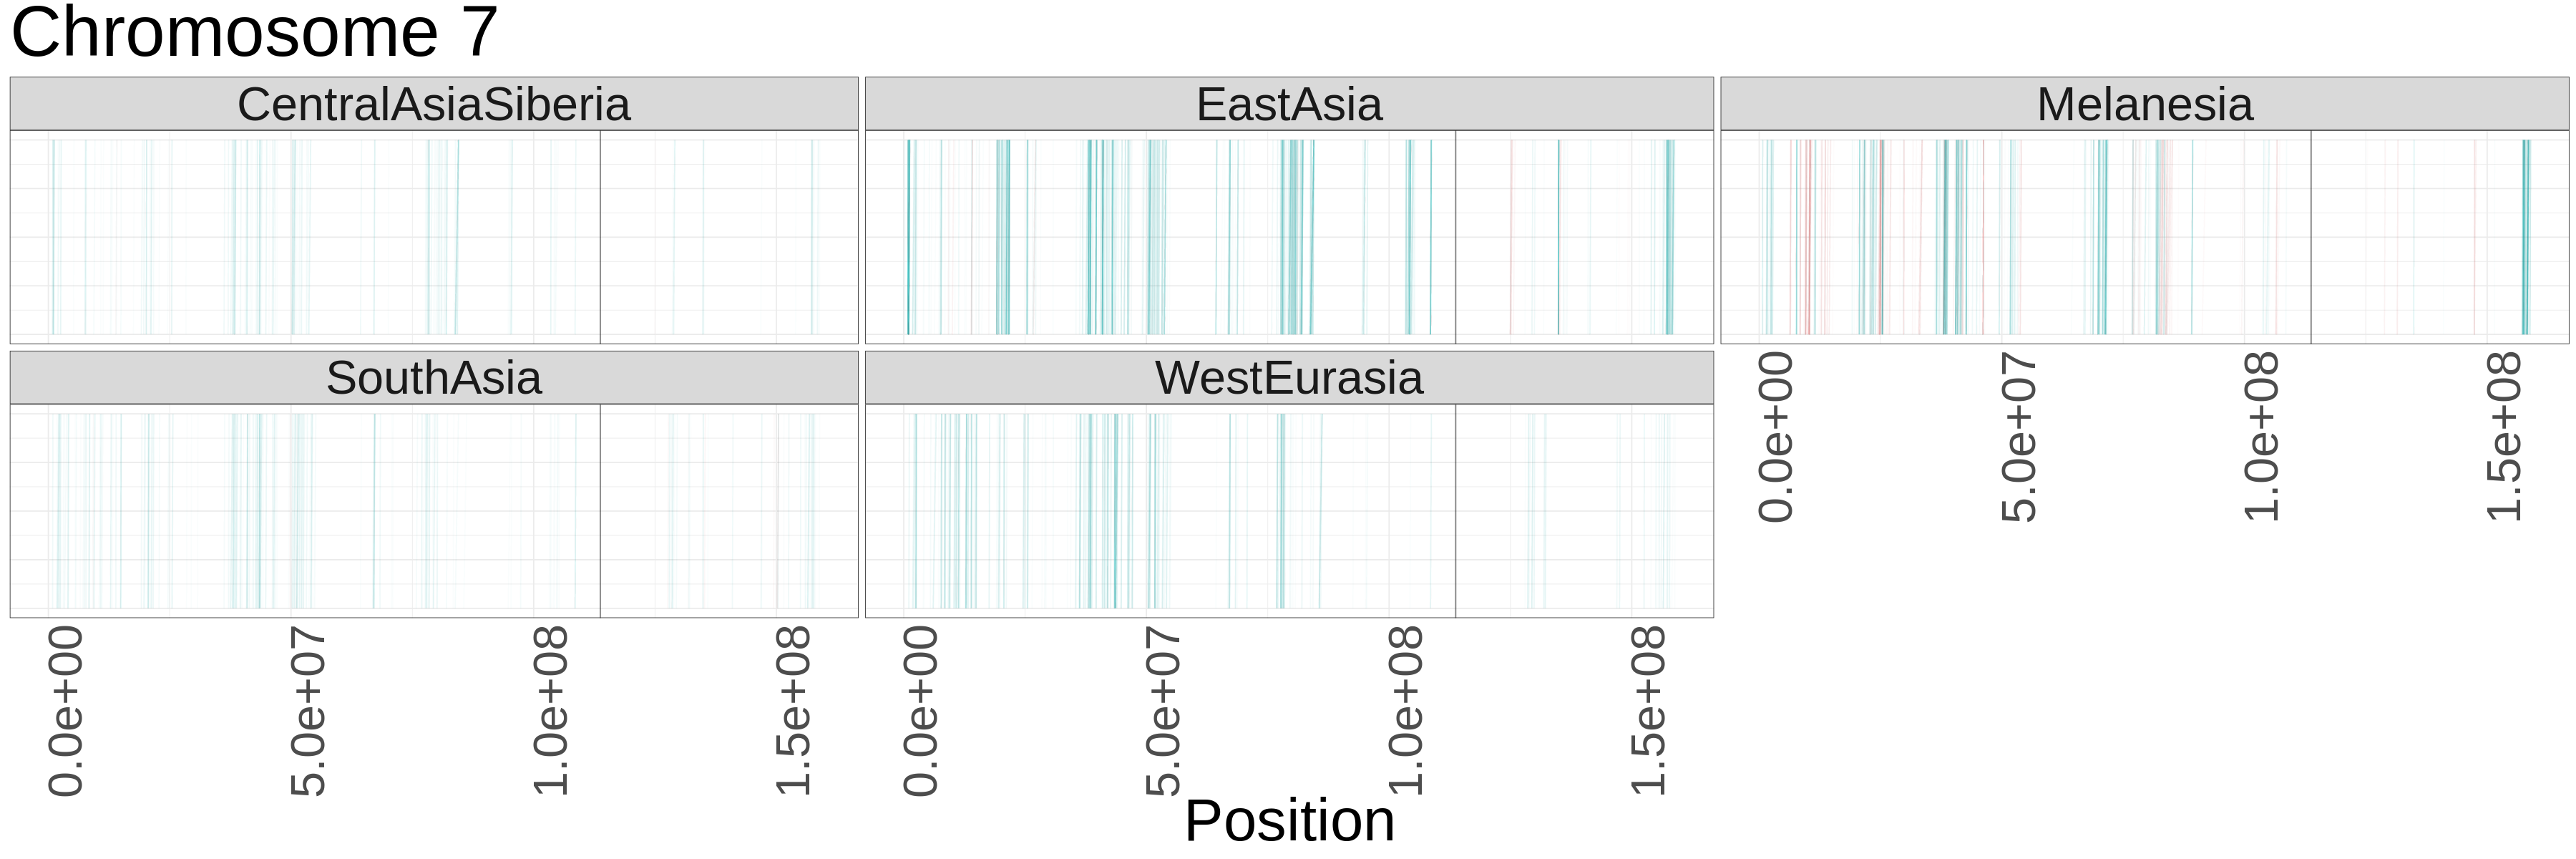

In [55]:
archaic_df %>%
    filter(chrom == "7") %>%
    arrange(region) %>%
    ggplot() +
        theme_bw() + 
        geom_segment(aes(x=start,xend=end,y=0, yend=1, col=closest_to), alpha=0.02) + facet_wrap(~region) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),  axis.text.y=element_blank(),axis.ticks=element_blank(),axis.title.y=element_blank(),legend.position="none") +
        geom_vline(xintercept = 113726365, alpha=0.5) +
        xlab("Position") + ggtitle(paste("Chromosome 7")) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1),text = element_text(size=50))